# Telecom Churn - ML Group Case Study

Team Members:
  
- **Salil Gautam** : [LinkedIn](https://www.linkedin.com/in/salil-gautam)
- **Navoneel Chakrabarty** : [LinkedIn](https://www.linkedin.com/in/navoneel-chakrabarty-314262129)

## Business Understanding

<div style="text-align: justify">
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. Aim for the project :
<br>    
    
- Analyse customer-level data of a leading telecom firm 
    
    
- Build predictive models to identify customers at high risk of churn and identify the main indicators of churn
    
</div>

<img src="customer-churn.jpg">

<div style="text-align: justify">
    
In churn prediction, we assume that there are three phases of customer lifecycle :

- **Good Phase**: In this phase, the customer is happy with the service and behaves as usual.
    <br>

- **Action Phase**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
    <br>

- **Churn Phase**: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
    
</div>

## Business Objectives

<div style="text-align: justify">
    
- **Understanding the typical customer behaviour during churn**  
    
    <br>
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

</div>

The Analysis is divided into 11 main parts :

1. Data Understanding
2. Data Cleaning and Manipulation - I
3. Filtering Data - High Value Customers
4. Target Variable Creation - Tag Churners 
5. Data Cleaning and Manipulation - II
6. Feature Engineering
7. Exploratory Data Analysis
8. Data Preparation
9. Predictive : Model Building + Evaluation
10. Interpretability : Model Building + Evaluation
11. Conclusion
12. Recommendations

## Data Understanding

#### Loading Libraries 

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("display.precision", 8)
pd.set_option('display.float_format', '{:.3f}'.format)
warnings.filterwarnings('ignore')

from tqdm import tqdm
import itertools
import statsmodels.api as sm
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

Using TensorFlow backend.


In [3]:
data = pd.read_csv('telecom_churn_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
data.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,

In [6]:
data.shape

(99999, 226)

In [7]:
df_description = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx').dropna()
df_description.style.set_properties(**{'width': '450px'})

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


- Used Data Dictionary to understand different columns
- Target Variable : **Has to be derived**

## Data Cleaning and Manipulation -  I

- We will only focus on the columns here which are required for filtering the high value customers and tagging the target variable
- We will handle data cleaning for other columns in the Part II

In [8]:
high_value_filter_cols = ['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7',
                          'av_rech_amt_data_7','total_rech_amt_6','total_rech_amt_7']

In [9]:
data[high_value_filter_cols].head(3)

,total_rech_data_6,av_rech_amt_data_6,total_rech_data_7,av_rech_amt_data_7,total_rech_amt_6,total_rech_amt_7
0,1.000,252.000,1.000,252.000,362,252
1,nan,nan,1.000,154.000,74,384
2,nan,nan,nan,nan,168,315


In [10]:
data[high_value_filter_cols].isnull().sum()

total_rech_data_6     74846
av_rech_amt_data_6    74846
total_rech_data_7     74428
av_rech_amt_data_7    74428
total_rech_amt_6          0
total_rech_amt_7          0
dtype: int64

In [11]:
data[high_value_filter_cols] = data[high_value_filter_cols].fillna(0)

- We can impute missing values with zeroes since it means customer didn't recharge their number that month

In [12]:
churn_tag_cols = ['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [13]:
data[churn_tag_cols].head(3)

,total_og_mou_9,total_ic_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.000,0.000,0.000,0.000
1,72.110,188.040,0.000,0.000
2,124.940,517.740,0.000,8.420


In [14]:
data[churn_tag_cols].isnull().sum()

total_og_mou_9    0
total_ic_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

- We luckily have no null values for the Churn Tagging columns

## Filtering Data - High Value Customers

- total data recharge amount = number of recharges * average recharge amount
- total recharge amount = total call recharge amount + total data recharge amount

In [15]:
data['total_data_rech_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']

In [16]:
data['total_amt_6'] = data['total_rech_amt_6'] + data['total_data_rech_6']
data['total_amt_7'] = data['total_rech_amt_7'] + data['total_data_rech_7']

In [17]:
data['avg_total_amt_6_7'] = (data['total_amt_6'] + data['total_amt_7'])/2

In [18]:
data['avg_total_amt_6_7'].describe([0.7])

count   99999.000
mean      485.328
std       869.424
min         0.000
50%       275.000
70%       478.000
max     61236.000
Name: avg_total_amt_6_7, dtype: float64

- 70th percentile : 478

In [19]:
data = data[data['avg_total_amt_6_7'] >= 478.0]
data = data.reset_index(drop=True)
data.shape

(30001, 231)

- Those who have recharged with an amount more than or equal to 478, where 478 is the 70th percentile of the average recharge amount in the first two months (the good phase).
- If we take only greater than then we end up with 29.9K rows which are mentioned on the portal but going ahead with specified mentioned text hence taking greater and equal to 478. This should be corrected in the problem statement

## Target Variable Creation - Tag Churners

In [20]:
data['total_usage'] = data['total_og_mou_9'] + data['total_ic_mou_9'] +\
                      data['vol_2g_mb_9'] + data['vol_3g_mb_9']

In [21]:
data['target'] = np.where(data['total_usage'] == 0, 1, 0)
data.shape

(30001, 233)

In [22]:
data['target'].value_counts(normalize=True)*100

0   91.864
1    8.136
Name: target, dtype: float64

- Churn Rate : 8.13%
- There is a class imbalance, which we will handle in the further steps

In [23]:
data.shape

(30001, 233)

In [24]:
churn_tag_cols.append('total_usage')
data = data.drop(churn_tag_cols,1)

In [25]:
data.shape

(30001, 228)

- Removing the columns used to derive the target variable 

## Data Cleaning and Manipulation -  II

- Removing all columns related to the Month 9 (September)

In [26]:
data = data.drop(data.filter(regex='_9|sep', axis = 1).columns, axis=1)

In [27]:
data.shape

(30001, 177)

- Removing the columns having all rows Null
- Removing the columns having all rows with same value (Not useful for the analysis)
- Check the % of Null values for the remaining columns

In [28]:
print("Number of columns having all rows Null : ",len(data.columns[data.isna().all()].tolist()))

Number of columns having all rows Null :  0


In [29]:
same_value_columns = data.columns[data.nunique(dropna=False) <= 1].values.tolist()
same_value_columns

['circle_id', 'last_date_of_month_6']

- Also considered removing columns which have same values in all rows as they don't give us any useful information

In [30]:
data = data.drop(same_value_columns,1)

In [31]:
data.shape

(30001, 175)

In [32]:
same_value_null_columns = data.columns[data.nunique(dropna=True) <= 1].values.tolist()
same_value_null_columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [33]:
data[same_value_null_columns].head(3)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,0.000,0.000,0.000,7/31/2014,8/31/2014,nan,nan,0.000,nan,nan,0.000
1,0.000,0.000,0.000,7/31/2014,8/31/2014,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,7/31/2014,8/31/2014,0.000,0.000,0.000,0.000,0.000,0.000


- These columns have only 1 unique value along with Nulls so we can impute the Nulls with -1, this can help us in modeling expect the date columns which we will drop
- We will treat them as categorical features

In [34]:
data = data.drop(['last_date_of_month_7','last_date_of_month_8'],1)

In [35]:
same_value_null_columns.remove('last_date_of_month_7')
same_value_null_columns.remove('last_date_of_month_8')

In [36]:
data[same_value_null_columns] = data[same_value_null_columns].fillna(-1)

In [37]:
data.head(3)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_total_amt_6_7,target
0,7000842753,0.000,0.000,0.000,197.385,214.816,213.803,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,-1.000,-1.000,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,4.130,nan,nan,1.150,nan,nan,5.440,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,-1.000,-1.000,0.000,nan,nan,0.000,0.000,0.000,5.440,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.000,1.000,1.000,252.000,252.000,252.000,0.000,0.000,0.000,1.000,1.000,1.000,252.000,252.000,252.000,30.130,1.320,5.750,83.570,150.760,109.610,212.170,212.170,212.170,212.170,212.170,212.170,0.000,0.000,0.000,0,0,0,0,0,0,1,1,1,0,0,0,1.000,1.000,1.000,968,30.400,0.000,101.200,252.000,252.000,614.000,504.000,559.000,1
1,7000701601,0.000,0.000,0.000,1069.180,1349.850,3171.480,57.840,54.680,52.290,453.430,567.160,325.910,16.230,33.490,31.640,23.740,12.590,38.060,51.390,31.380,40.280,308.630,447.380,162.280,62.130,55.140,53.230,0.000,0.000,0.000,422.160,533.910,255.790,4.300,23.290,12.010,49.890,31.760,49.140,6.660,20.080,16.680,0.000,0.000,0.000,60.860,75.140,77.840,0.000,0.180,10.010,4.500,0.000,6.500,0.000,0.000,0.000,487.530,609.240,350.160,58.140,32.260,27.310,217.560,221.490,121.190,152.160,101.460,39.530,427.880,355.23

In [38]:
data = data.drop(['mobile_number'],1)

- Removing mobile_number column as it is similar to an ID for every customer

In [39]:
data.shape

(30001, 172)

In [40]:
nullseries = data.isnull().sum()
null_percentage = nullseries[nullseries > 0]/data.shape[0]*100
print(null_percentage)

onnet_mou_6                 1.817
onnet_mou_7                 1.790
onnet_mou_8                 3.913
offnet_mou_6                1.817
offnet_mou_7                1.790
offnet_mou_8                3.913
roam_ic_mou_6               1.817
roam_ic_mou_7               1.790
roam_ic_mou_8               3.913
roam_og_mou_6               1.817
roam_og_mou_7               1.790
roam_og_mou_8               3.913
loc_og_t2t_mou_6            1.817
loc_og_t2t_mou_7            1.790
loc_og_t2t_mou_8            3.913
loc_og_t2m_mou_6            1.817
loc_og_t2m_mou_7            1.790
loc_og_t2m_mou_8            3.913
loc_og_t2f_mou_6            1.817
loc_og_t2f_mou_7            1.790
loc_og_t2f_mou_8            3.913
loc_og_t2c_mou_6            1.817
loc_og_t2c_mou_7            1.790
loc_og_t2c_mou_8            3.913
loc_og_mou_6                1.817
loc_og_mou_7                1.790
loc_og_mou_8                3.913
std_og_t2t_mou_6            1.817
std_og_t2t_mou_7            1.790
std_og_t2t_mou

- Let's tackle missing data columns in groups
- Groups :
    - fb_user
    - night_pck_user
    - total_rech_data
    - av_rech_amt_data
    - max_rech_data
    - count_rech
    - mou
    - others
    - date_of_
    - arpu

In [41]:
data[['fb_user_6','fb_user_7','fb_user_8']] = data[['fb_user_6','fb_user_7','fb_user_8']].fillna(-1)

In [42]:
data[['night_pck_user_6','night_pck_user_7','night_pck_user_8']] = data[['night_pck_user_6','night_pck_user_7','night_pck_user_8']].fillna(-1)

- Creating a new category for fb_user and night_pck_user columns with Null values 

In [43]:
data[['total_rech_data_8','av_rech_amt_data_8']] = data[['total_rech_data_8','av_rech_amt_data_8']].fillna(0)

In [44]:
data[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = data[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].fillna(0)

- We can impute missing values with zero since it means customer didn't recharge their number that month

In [45]:
count_rech_cols= ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6',
                  'count_rech_3g_7','count_rech_3g_8']
data[count_rech_cols].head(3)

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
0,0.000,0.000,0.000,1.000,1.000,1.000
1,nan,nan,nan,nan,nan,nan
2,nan,2.000,3.000,nan,0.000,0.000


In [46]:
data[count_rech_cols] = data[count_rech_cols].fillna(0)

- We can impute missing values with zero since it means customer didn't recharge their internet that month

In [47]:
data[data.filter(regex='_mou_', axis = 1).columns].head(3)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
0,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,-1.000,-1.000,0.000,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,4.130,nan,nan,1.150,nan,nan,5.440,nan,nan,0.000,nan,nan,0.000,nan,nan,0.000,-1.000,-1.000,0.000,nan,nan,0.000,0.000,0.000,5.440,nan,nan,0.000,nan,nan,0.000
1,57.840,54.680,52.290,453.430,567.160,325.910,16.230,33.490,31.640,23.740,12.590,38.060,51.390,31.380,40.280,308.630,447.380,162.280,62.130,55.140,53.230,0.000,0.000,0.000,422.160,533.910,255.790,4.300,23.290,12.010,49.890,31.760,49.140,6.660,20.080,16.680,0.000,0.000,0.000,60.860,75.140,77.840,0.000,0.180,10.010,4.500,0.000,6.500,487.530,609.240,350.160,58.140,32.260,27.310,217.560,221.490,121.190,152.160,101.460,39.530,427.880,355.230,188.040,36.890,11.830,30.390,91.440,126.990,141.330,52.190,34.240,22.210,0.000,0.000,0.000,180.540,173.080,193.940,626.460,558.040,428.740,0.210,0.000,0.000,2.060,14.530,31.590
2,413.690,351.030,35.080,94.660,80.630,136.480,0.000,0.000,0.000,0.000,0.000,0.000,297.130,217.590,12.490,80.960,70.580,50.540,0.000,0.000,0.000,0.000,0.000,7.150,378.090,288.180,63.040,116.560,133.430,22.580,13.690,10.040,75.690,0.000,0.000,0.000,0.000,0.000,0.000,130.260,143.480,98.280,0.000,0.000,0.000,0.000,0.000,10.230,508.360,431.660,171.560,23.840,9.840,0.310,57.580,13.980,15.480,0.000,0.000,0.000,81.430,23.830,15.790,0.000,0.580,0.100,22.430,4.080,0.650,0.000,0.000,0.000,0.000,0.000,0.000,22.430,4.660,0.750,103.860,28.490,16.540,0.000,0.000,0.000,0.000,0.000,0.000


In [48]:
data[data.filter(regex='_mou_', axis = 1).columns] = data[data.filter(regex='_mou_', axis = 1).columns].fillna(0)

- We can impute missing values with zero since mou with Nulls could mean no usage, filling with mean or median can exaggerate the data

In [49]:
data[data.filter(regex='_others_', axis = 1).columns].head(3)

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
0,nan,nan,0.000,nan,nan,0.000
1,0.000,0.000,0.000,15.740,15.190,15.140
2,0.000,0.000,0.000,0.000,0.000,0.000


In [50]:
data[data.filter(regex='_others_', axis = 1).columns] = data[data.filter(regex='_others_', axis = 1).columns].fillna(0)

- We can impute missing values with zero since mou with Nulls could mean no call usage, filling with mean or median can exaggerate the data

In [51]:
data[data.filter(regex='date_of_', axis = 1).columns].head(3)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
1,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
2,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014


In [52]:
data = data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],1)

In [53]:
data[data.filter(regex='date_of_', axis = 1).columns].mode()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014


In [54]:
data['date_of_last_rech_6'] = data['date_of_last_rech_6'].fillna('6/30/2014')
data['date_of_last_rech_7'] = data['date_of_last_rech_7'].fillna('7/31/2014')
data['date_of_last_rech_8'] = data['date_of_last_rech_8'].fillna('8/31/2014')

- Dropping date_of_last_rech_data based columns as they have very high missing values
- Will be filling the date_of_last_rech columns using the last date of the month (mode)

In [55]:
arpu_cols = ['arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8']
data[arpu_cols].describe()

,arpu_3g_6,arpu_2g_6,arpu_3g_7,arpu_2g_7,arpu_3g_8,arpu_2g_8
count,16756.000,16756.000,17057.000,17057.000,15953.000,15953.000
mean,119.975,113.586,120.696,113.801,118.051,109.817
std,226.093,201.793,229.575,206.067,218.941,195.349
min,-30.280,-15.320,-26.040,-15.480,-24.490,-24.430
25%,0.000,0.010,0.000,0.000,0.000,0.000
50%,15.480,26.915,12.950,24.000,10.020,19.900
75%,177.788,168.517,180.040,166.910,179.490,157.190
max,6362.280,6433.760,4980.900,4809.360,3716.900,3467.170


In [56]:
data = data.drop(arpu_cols,1)

- ARPU means the revenue generated per user, as these columns have high missing value and we already have arpu columns available with no missing value we drop them

In [57]:
nullseries = data.isnull().sum()
null_percentage = nullseries[nullseries > 0]/data.shape[0]*100
print(null_percentage)

Series([], dtype: float64)


In [58]:
data.shape

(30001, 163)

- We have treated all missing values
- We can always come back to this stage in a Data Science Project based on feedback from the business about missing values causes/reasons for the assignment we treated them according to our understanding

## Feature Engineering

In [59]:
data.head(3)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_total_amt_6_7,target
0,0.000,0.000,0.000,197.385,214.816,213.803,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.160,0.000,0.000,4.130,0.000,0.000,1.150,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,1.000,1.000,1.000,252.000,252.000,252.000,0.000,0.000,0.000,1.000,1.000,1.000,252.000,252.000,252.000,30.130,1.320,5.750,83.570,150.760,109.610,0.000,0.000,0.000,0,0,0,0,0,0,1,1,1,0,0,0,1.000,1.000,1.000,968,30.400,0.000,101.200,252.000,252.000,614.000,504.000,559.000,1
1,0.000,0.000,0.000,1069.180,1349.850,3171.480,57.840,54.680,52.290,453.430,567.160,325.910,16.230,33.490,31.640,23.740,12.590,38.060,51.390,31.380,40.280,308.630,447.380,162.280,62.130,55.140,53.230,0.000,0.000,0.000,422.160,533.910,255.790,4.300,23.290,12.010,49.890,31.760,49.140,6.660,20.080,16.680,0.000,0.000,0.000,60.860,75.140,77.840,0.000,0.180,10.010,4.500,0.000,6.500,0.000,0.000,0.000,487.530,609.240,350.160,58.140,32.260,27.310,217.560,221.490,121.190,152.160,101.460,39.530,427.880,355.230,188.040,36.890,11.830,30.390,91.440,126.990,141.330,52.190,34.240,22.210,0.000,0.000,0.000,180.540,173.080,193.940,626.460,558.040,428.740

In [60]:
data['date_of_last_rech_6'] = pd.to_datetime(data['date_of_last_rech_6'])
data['date_of_last_rech_7'] = pd.to_datetime(data['date_of_last_rech_7'])
data['date_of_last_rech_8'] = pd.to_datetime(data['date_of_last_rech_8'])

In [61]:
data['date_of_last_rech_day_6'] = data['date_of_last_rech_6'].dt.day
data['date_of_last_rech_dayofwk_6'] = data['date_of_last_rech_6'].dt.dayofweek.astype(int)

data['date_of_last_rech_day_7'] = data['date_of_last_rech_7'].dt.day
data['date_of_last_rech_dayofwk_7'] = data['date_of_last_rech_7'].dt.dayofweek.astype(int)

data['date_of_last_rech_day_8'] = data['date_of_last_rech_8'].dt.day
data['date_of_last_rech_dayofwk_8'] = data['date_of_last_rech_8'].dt.dayofweek.astype(int)

In [62]:
data = data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],1)

In [63]:
# Converting into yearly buckets
data['aon_years']=data['aon']/365
data['aon_years'] = data['aon_years'].astype(int)

In [64]:
# Making difference features using the : 8th month - (6th month + 7th month)/2
diff_feats = ['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou',
              'loc_og_mou','std_og_mou','isd_og_mou','spl_og_mou','total_og_mou',
              'loc_ic_mou','std_ic_mou','isd_ic_mou','spl_ic_mou',
              'total_ic_mou','total_rech_num','total_rech_amt','max_rech_amt',
              'total_rech_data','max_rech_data','av_rech_amt_data','vol_2g_mb','vol_3g_mb']

In [65]:
for x in diff_feats:
    data[x+'_diff'] = data[x+'_8'] - ((data[x+'_7'] + data[x+'_6'])/2)

In [66]:
data.isnull().sum()

loc_og_t2o_mou                 0
std_og_t2o_mou                 0
loc_ic_t2o_mou                 0
arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou

In [67]:
data.head(3)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_total_amt_6_7,target,date_of_last_rech_day_6,date_of_last_rech_dayofwk_6,date_of_last_rech_day_7,date_of_last_rech_dayofwk_7,date_of_last_rech_day_8,date_of_last_rech_dayofwk_8,aon_years,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.000,0.000,0.000,197.385,214.816,213.803,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.160,0.000,0.000,4.130,0.000,0.000,1.150,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4,3,2,362,252,252,252,252,252,252,252,252,1.000,1.000,1.000,252.000,252.000,252.000,0.000,0.000,0.000,1.000,1.000,1.000,252.000,252.000,252.000,30.130,1.320,5.750,83.570,150.760,109.610,0.000,0.000,0.000,0,0,0,0,0,0,1,1,1,0,0,0,1.000,1.000,1.000,968,30.400,0.000,101.200,252.000,252.000,614.000,504.000,559.000,1,21,5,16,2,8,4,2,7.703,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,5.440,-1.500,-55.000,0.000,0.000,0.000,0.000,-9.975,-7.555
1,0.000,0.000,0.00

In [68]:
data.shape

(30001, 190)

- We have made new 30 features, we can decide which one to drop after EDA or during Modeling

## Exploratory Data Analysis

### Univariate Analysis

**Aim** : To understand the final variables of analysis in depth individually
- To use these insights to have intutions about interesting combinations which can be explored during Bivariate analysis

#### target

In [69]:
(data['target'].value_counts(normalize=True) * 100).to_frame().style.background_gradient(cmap='Greens', low=0)

,target
0,91.863605
1,8.1363955


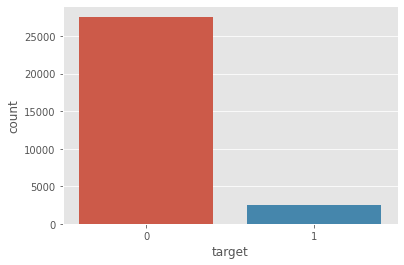

In [70]:
sns.countplot(data=data,x='target')
plt.show()

#### arpu (Average revenue per user)

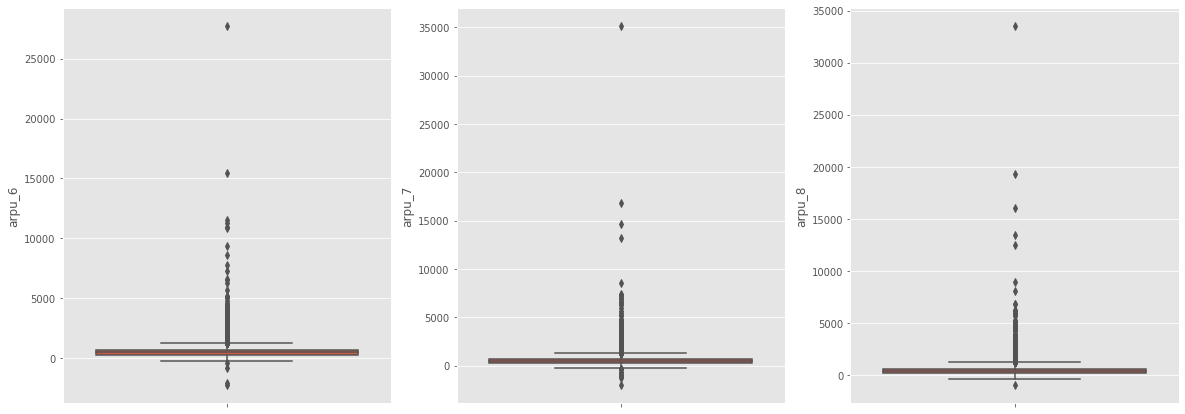

In [71]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
attribute = 'arpu'
sns.boxplot(data=data, y=attribute+"_6",
            showfliers=True)
plt.subplot(2,3,2)
sns.boxplot(data=data, y=attribute+"_7",
            showfliers=True)
plt.subplot(2,3,3)
sns.boxplot(data=data, y=attribute+"_8",
            showfliers=True)
plt.show()

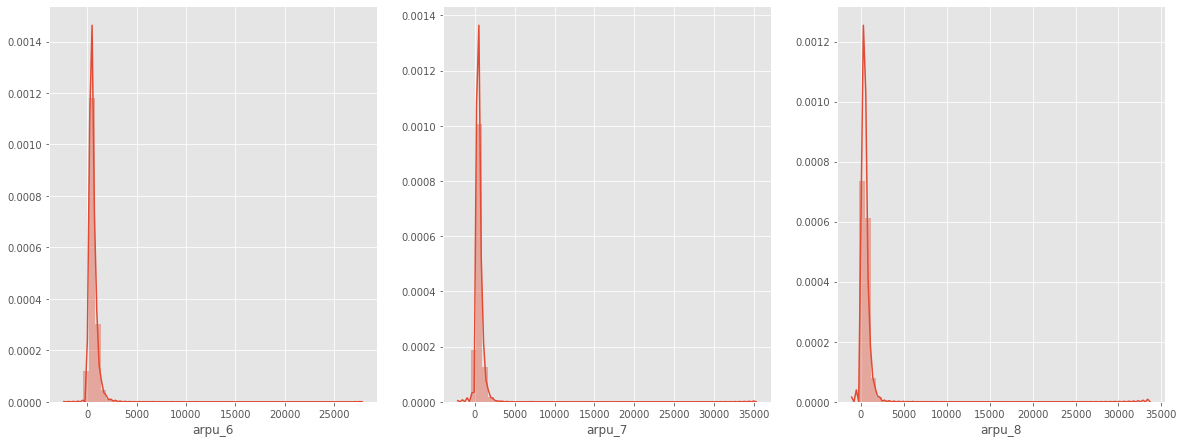

In [72]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.distplot(data["arpu_6"])
plt.subplot(2,3,2)
sns.distplot(data["arpu_7"])
plt.subplot(2,3,3)
sns.distplot(data["arpu_8"])
plt.show()

#### date_of_last_rech_day

In [73]:
(data['date_of_last_rech_day_8'].value_counts(normalize=True) * 100).to_frame().style.background_gradient(cmap='Greens', low=0)

,date_of_last_rech_day_8
31,22.609246
30,15.439485
29,11.21296
28,10.18966
26,7.6264125
25,7.2164261
27,6.1864605
24,4.3631879
22,1.7832739
23,1.6899437


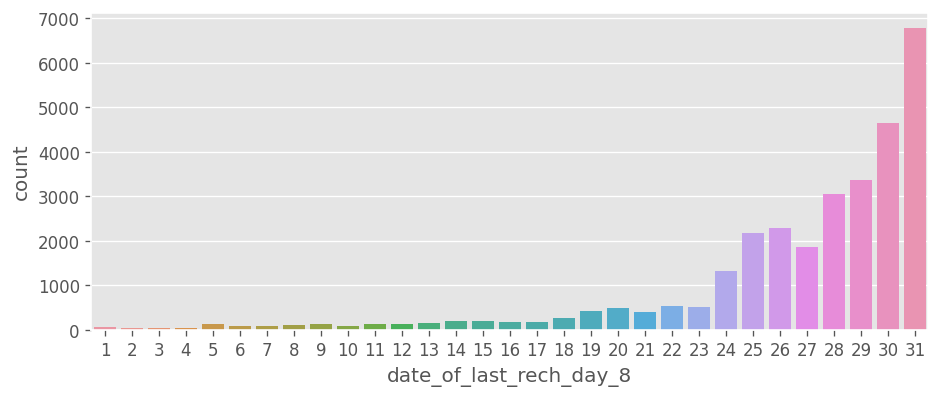

In [74]:
plt.figure(figsize=[9.0,3.5],dpi=120,edgecolor='c',frameon=True)
sns.countplot(data=data,x='date_of_last_rech_day_8')
plt.show()

#### aon_years

In [75]:
(data['aon_years'].value_counts(normalize=True) * 100).to_frame().style.background_gradient(cmap='Greens', low=0)

,aon_years
1,26.575781
0,17.579414
2,15.49615
3,10.006333
6,6.3664545
4,6.329789
7,5.519816
8,4.7198427
5,3.8898703
9,1.7566081


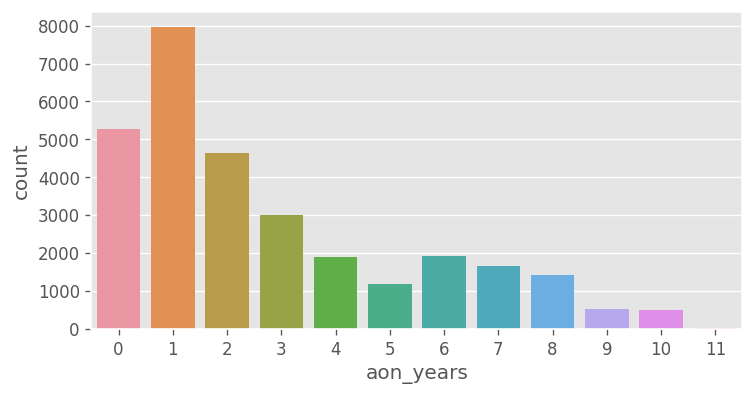

In [76]:
plt.figure(figsize=[7.0,3.5],dpi=120,edgecolor='c',frameon=True)
sns.countplot(data=data,x='aon_years')
plt.show()

#### total_ic_mou

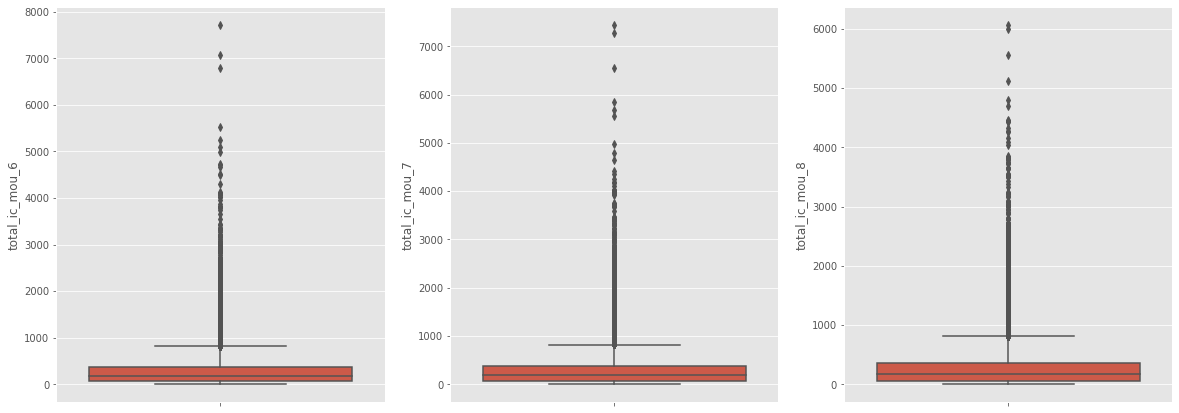

In [77]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
attribute = 'total_ic_mou'
sns.boxplot(data=data, y=attribute+"_6",
            showfliers=True)
plt.subplot(2,3,2)
sns.boxplot(data=data, y=attribute+"_7",
            showfliers=True)
plt.subplot(2,3,3)
sns.boxplot(data=data, y=attribute+"_8",
            showfliers=True)
plt.show()

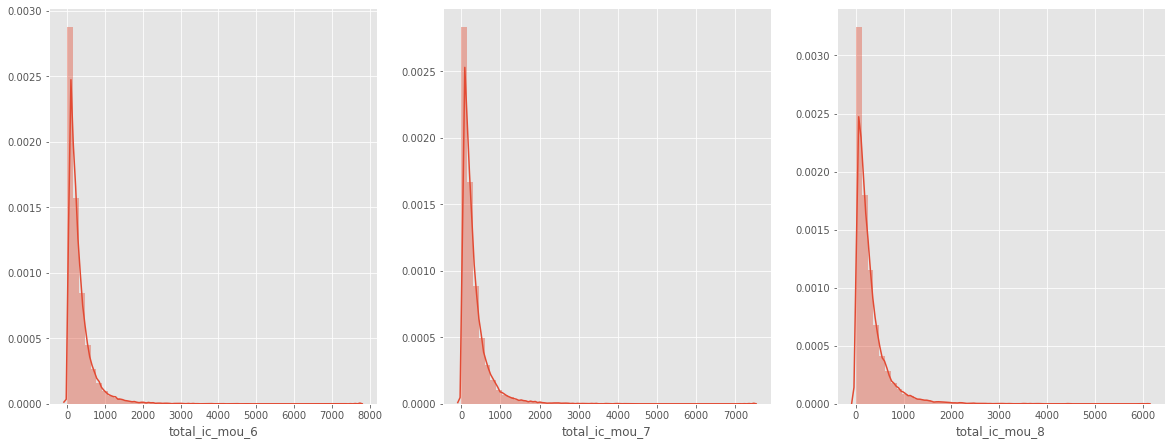

In [78]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.distplot(data["total_ic_mou_6"])
plt.subplot(2,3,2)
sns.distplot(data["total_ic_mou_7"])
plt.subplot(2,3,3)
sns.distplot(data["total_ic_mou_8"])
plt.show()

 - We will move to Bivariate Analysis because it makes sense to see the sepration of the target variable wrt to other columns

### Bivariate Analysis

**Aim** : To understand the final variables of analysis for providing recommendations to business

#### aon_years vs target

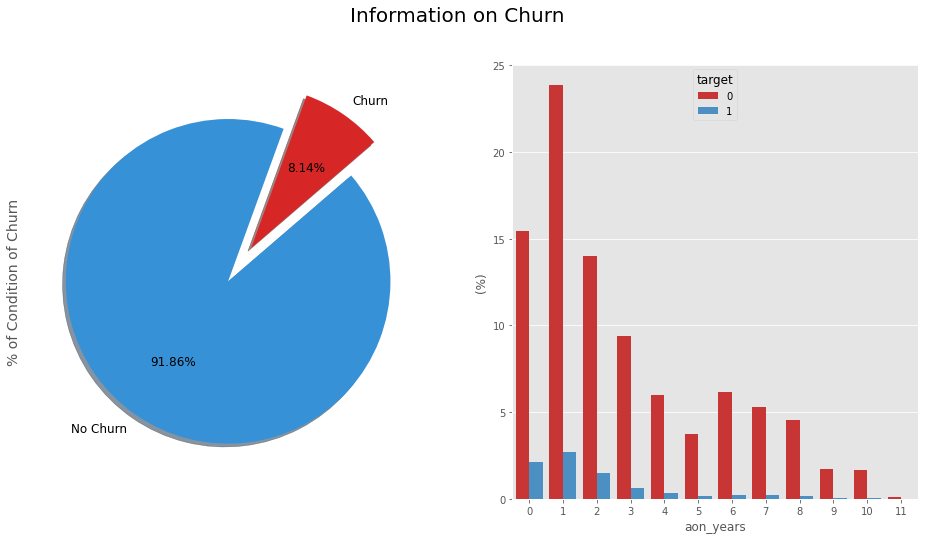

In [79]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#3791D7", "#D72626"]
labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

data["target"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of Condition of Churn', fontsize=14)
palette = [ "#E01E1B","#3791D7"]
sns.barplot(x="aon_years", y="target", hue="target", data=data, palette=palette, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")
plt.show()

#### arpu vs target

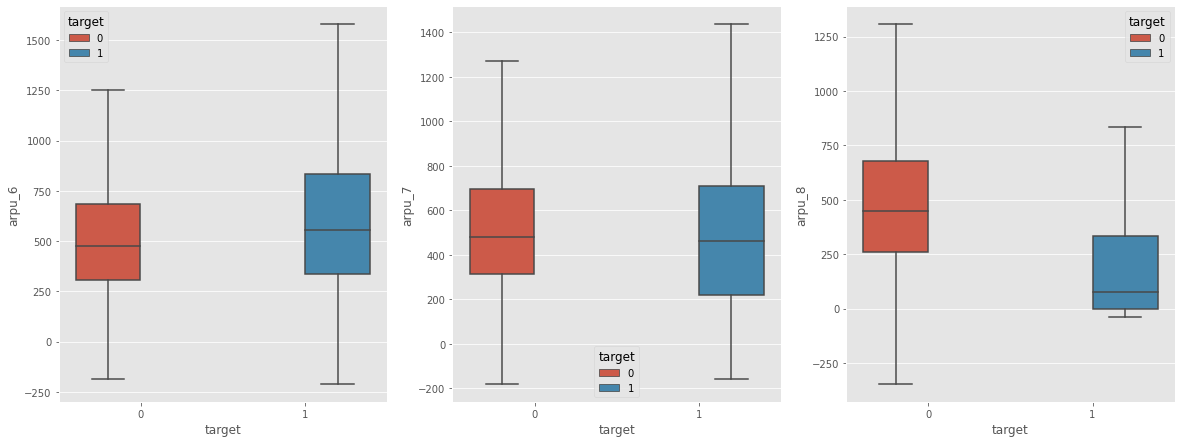

In [80]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
attribute = 'arpu'
sns.boxplot(data=data, y=attribute+"_6",x='target',hue='target',
            showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=data, y=attribute+"_7",x='target',hue='target',
            showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=data, y=attribute+"_8",x='target',hue='target',
            showfliers=False)
plt.show()

- We can see a drop in the arpu for churned customers in the 8th Month

#### total_rech_num vs target

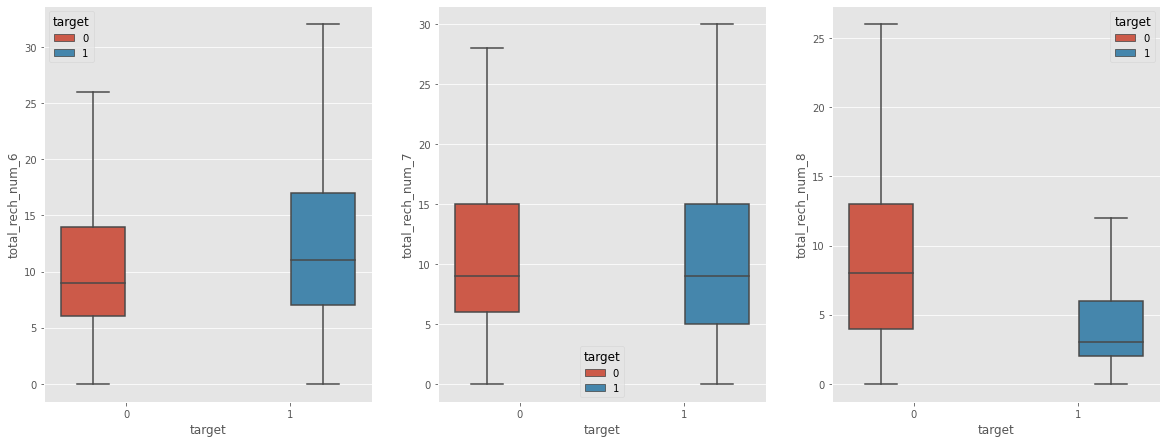

In [81]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
attribute = 'total_rech_num'
sns.boxplot(data=data, y=attribute+"_6",x='target',hue='target',
            showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=data, y=attribute+"_7",x='target',hue='target',
            showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=data, y=attribute+"_8",x='target',hue='target',
            showfliers=False)
plt.show()

- We can see that there is a huge drop in total recharge number also in the 8th month

#### offnet_mou vs target

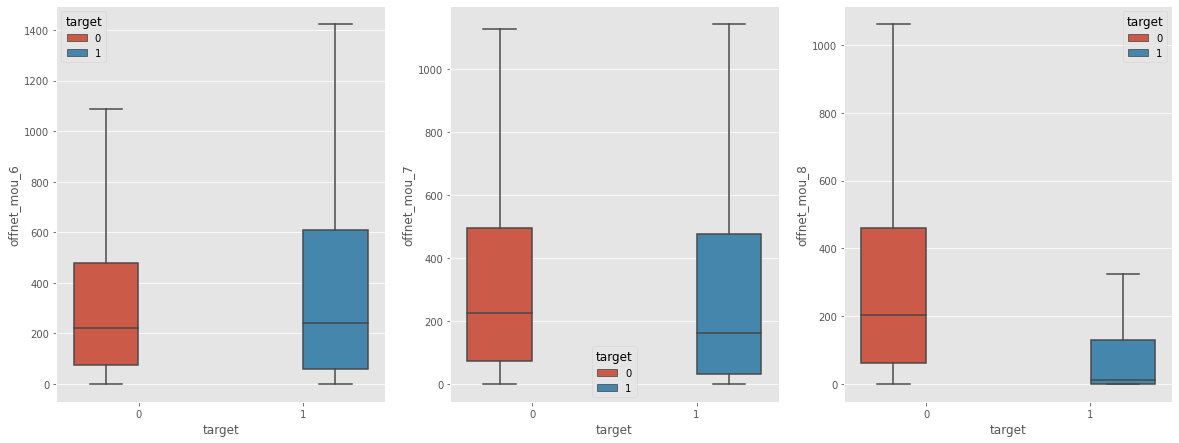

In [82]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
attribute = 'offnet_mou'
sns.boxplot(data=data, y=attribute+"_6",x='target',hue='target',
            showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=data, y=attribute+"_7",x='target',hue='target',
            showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=data, y=attribute+"_8",x='target',hue='target',
            showfliers=False)
plt.show()

#### Heat Map

In [83]:
# categorical features + target variable
cat_feats = ['target','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
             'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
             'std_ic_t2o_mou_8','date_of_last_rech_day_6','date_of_last_rech_dayofwk_6',
             'date_of_last_rech_day_7','date_of_last_rech_dayofwk_7','date_of_last_rech_day_8',
             'date_of_last_rech_dayofwk_8','aon_years','fb_user_6','fb_user_7','fb_user_8',
             'night_pck_user_6','night_pck_user_7','night_pck_user_8']

In [84]:
num_cols = list(set(data.columns.tolist()) - set(cat_feats))

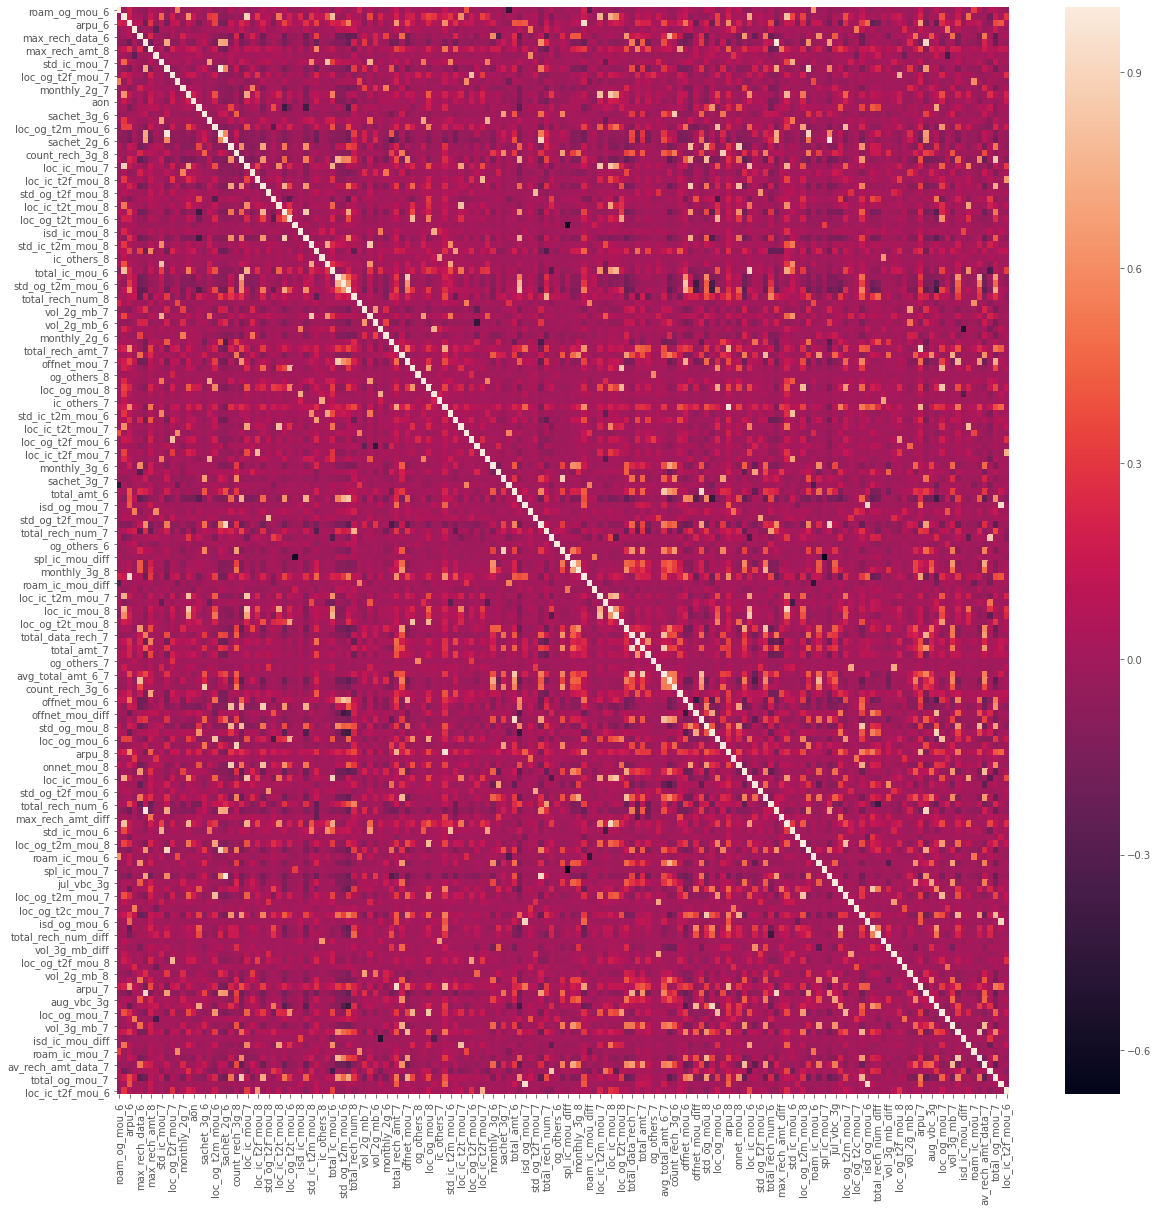

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(data[num_cols].corr(),annot=False)
plt.show()

- We can see many highly correlated variables let's remove them keeping the threshold as 0.85

In [86]:
# np.random.seed(0)
# corr_matrix = data[num_cols].corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.85)] 
# to_drop

- Removing : ['loc_ic_mou_8',
 'arpu_6',
 'sachet_2g_8',
 'offnet_mou_8',
 'count_rech_2g_6',
 'isd_og_mou_6',
 'avg_total_amt_6_7',
 'sachet_3g_8',
 'std_og_mou_diff',
 'total_rech_data_8',
 'total_rech_amt_8',
 'onnet_mou_6',
 'loc_ic_mou_7',
 'isd_og_mou_8',
 'arpu_7',
 'count_rech_2g_7',
 'total_ic_mou_6',
 'total_og_mou_8',
 'total_data_rech_7',
 'total_rech_data_6',
 'onnet_mou_8',
 'std_og_t2t_mou_7',
 'loc_ic_mou_diff',
 'sachet_3g_6',
 'offnet_mou_7',
 'sachet_3g_7',
 'total_data_rech_6',
 'total_rech_data_7']

In [87]:
to_drop = ['loc_ic_mou_8','arpu_6','sachet_2g_8','offnet_mou_8','count_rech_2g_6','isd_og_mou_6',
           'avg_total_amt_6_7','sachet_3g_8','std_og_mou_diff','total_rech_data_8','total_rech_amt_8',
           'onnet_mou_6','loc_ic_mou_7','isd_og_mou_8','arpu_7','count_rech_2g_7','total_ic_mou_6',
           'total_og_mou_8','total_data_rech_7','total_rech_data_6','onnet_mou_8','std_og_t2t_mou_7',
           'loc_ic_mou_diff','sachet_3g_6','offnet_mou_7','sachet_3g_7','total_data_rech_6',
           'total_rech_data_7']

In [88]:
data = data.drop(to_drop,1)

In [89]:
num_cols = list(set(data.columns.tolist()) - set(cat_feats))

In [90]:
data.shape

(30001, 162)

## Data Preparation

In [91]:
data[num_cols].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,roam_og_mou_6,total_ic_mou_7,spl_og_mou_7,max_rech_data_6,max_rech_amt_8,spl_og_mou_diff,std_ic_mou_7,count_rech_2g_8,loc_og_t2f_mou_7,roam_og_mou_7,monthly_2g_7,loc_ic_t2m_mou_8,aon,onnet_mou_diff,std_ic_t2t_mou_7,loc_og_t2m_mou_6,sachet_2g_6,std_og_t2t_mou_8,count_rech_3g_8,std_og_mou_7,monthly_2g_8,loc_ic_t2f_mou_8,onnet_mou_7,std_og_t2f_mou_8,loc_og_mou_diff,loc_ic_t2t_mou_8,spl_ic_mou_6,loc_og_t2t_mou_6,isd_ic_mou_8,std_og_t2t_mou_6,std_ic_t2m_mou_8,max_rech_amt_6,ic_others_8,std_ic_t2m_mou_7,std_og_t2m_mou_7,std_og_t2m_mou_6,total_og_mou_6,total_rech_num_8,roam_ic_mou_8,vol_2g_mb_7,std_ic_mou_8,vol_2g_mb_6,isd_ic_mou_6,monthly_2g_6,total_rech_data_diff,total_rech_amt_7,vol_3g_mb_8,loc_og_t2t_mou_7,og_others_8,std_ic_t2t_mou_8,loc_og_mou_8,isd_ic_mou_7,ic_others_7,std_ic_t2m_mou_6,last_day_rch_amt_6,loc_ic_t2t_mou_7,roam_og_mou_8,loc_og_t2f_mou_6,vol_2g_mb_diff,loc_ic_t2f_mou_7,std_ic_t2t_mou_6,monthly_3g_6,max_rech_data_diff,roam_og_mou_diff,total_amt_6,std_og_mou_6,isd_og_mou_7,spl_og_mou_8,std_og_t2f_mou_7,total_rech_num_7,og_others_6,count_rech_3g_7,spl_ic_mou_diff,monthly_3g_7,monthly_3g_8,total_rech_amt_6,roam_ic_mou_diff,spl_ic_mou_8,loc_ic_t2m_mou_7,std_ic_mou_diff,max_rech_data_8,loc_ic_t2m_mou_6,loc_og_t2t_mou_8,max_rech_amt_7,total_amt_7,last_day_rch_amt_7,og_others_7,std_ic_t2f_mou_7,av_rech_amt_data_6,count_rech_3g_6,last_day_rch_amt_8,offnet_mou_6,offnet_mou_diff,std_og_mou_8,loc_og_mou_6,arpu_8,loc_og_t2c_mou_8,max_rech_data_7,loc_ic_mou_6,av_rech_amt_data_diff,std_og_t2f_mou_6,av_rech_amt_data_8,total_rech_num_6,sachet_2g_7,max_rech_amt_diff,total_ic_mou_8,std_ic_mou_6,isd_og_mou_diff,loc_og_t2m_mou_8,roam_ic_mou_6,vol_3g_mb_6,spl_ic_mou_7,jul_vbc_3g,total_rech_amt_diff,loc_og_t2m_mou_7,std_ic_t2f_mou_8,loc_og_t2c_mou_7,total_rech_num_diff,arpu_diff,ic_others_6,vol_3g_mb_diff,std_ic_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,vol_2g_mb_8,jun_vbc_3g,aug_vbc_3g,total_og_mou_diff,loc_og_mou_7,spl_og_mou_6,vol_3g_mb_7,isd_ic_mou_diff,loc_ic_t2t_mou_6,roam_ic_mou_7,std_og_t2m_mou_8,av_rech_amt_data_7,total_ic_mou_diff,total_og_mou_7,loc_ic_t2f_mou_6
count,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000
mean,26.572,296.757,7.109,78.080,160.144,0.094,49.046,1.208,6.424,20.152,0.183,146.233,1209.369,-30.194,15.422,163.243,1.066,148.441,0.413,363.985,0.154,14.403,267.819,1.585,-18.870,62.619,0.061,84.485,10.998,165.885,27.923,169.285,1.224,30.823,187.921,179.433,609.866,9.973,12.501,125.097,44.402,126.522,10.785,0.174,-0.139,660.498,351.494,85.674,0.058,13.914,235.728,11.876,1.500,29.195,100.894,66.637,19.866,6.344,-19.897,16.036,14.895,0.218,-6.468,-3.496,1116.510,347.126,2.106,6.557,1.826,11.719,

In [92]:
for col in tqdm(num_cols):
    temp = data[col].quantile([0.01,0.99]).values
    data[col][data[col] <= temp[0]] = temp[0]
    data[col][data[col] >= temp[1]] = temp[1]

100%|██████████| 139/139 [01:06<00:00,  2.11it/s]


In [93]:
data[num_cols].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,roam_og_mou_6,total_ic_mou_7,spl_og_mou_7,max_rech_data_6,max_rech_amt_8,spl_og_mou_diff,std_ic_mou_7,count_rech_2g_8,loc_og_t2f_mou_7,roam_og_mou_7,monthly_2g_7,loc_ic_t2m_mou_8,aon,onnet_mou_diff,std_ic_t2t_mou_7,loc_og_t2m_mou_6,sachet_2g_6,std_og_t2t_mou_8,count_rech_3g_8,std_og_mou_7,monthly_2g_8,loc_ic_t2f_mou_8,onnet_mou_7,std_og_t2f_mou_8,loc_og_mou_diff,loc_ic_t2t_mou_8,spl_ic_mou_6,loc_og_t2t_mou_6,isd_ic_mou_8,std_og_t2t_mou_6,std_ic_t2m_mou_8,max_rech_amt_6,ic_others_8,std_ic_t2m_mou_7,std_og_t2m_mou_7,std_og_t2m_mou_6,total_og_mou_6,total_rech_num_8,roam_ic_mou_8,vol_2g_mb_7,std_ic_mou_8,vol_2g_mb_6,isd_ic_mou_6,monthly_2g_6,total_rech_data_diff,total_rech_amt_7,vol_3g_mb_8,loc_og_t2t_mou_7,og_others_8,std_ic_t2t_mou_8,loc_og_mou_8,isd_ic_mou_7,ic_others_7,std_ic_t2m_mou_6,last_day_rch_amt_6,loc_ic_t2t_mou_7,roam_og_mou_8,loc_og_t2f_mou_6,vol_2g_mb_diff,loc_ic_t2f_mou_7,std_ic_t2t_mou_6,monthly_3g_6,max_rech_data_diff,roam_og_mou_diff,total_amt_6,std_og_mou_6,isd_og_mou_7,spl_og_mou_8,std_og_t2f_mou_7,total_rech_num_7,og_others_6,count_rech_3g_7,spl_ic_mou_diff,monthly_3g_7,monthly_3g_8,total_rech_amt_6,roam_ic_mou_diff,spl_ic_mou_8,loc_ic_t2m_mou_7,std_ic_mou_diff,max_rech_data_8,loc_ic_t2m_mou_6,loc_og_t2t_mou_8,max_rech_amt_7,total_amt_7,last_day_rch_amt_7,og_others_7,std_ic_t2f_mou_7,av_rech_amt_data_6,count_rech_3g_6,last_day_rch_amt_8,offnet_mou_6,offnet_mou_diff,std_og_mou_8,loc_og_mou_6,arpu_8,loc_og_t2c_mou_8,max_rech_data_7,loc_ic_mou_6,av_rech_amt_data_diff,std_og_t2f_mou_6,av_rech_amt_data_8,total_rech_num_6,sachet_2g_7,max_rech_amt_diff,total_ic_mou_8,std_ic_mou_6,isd_og_mou_diff,loc_og_t2m_mou_8,roam_ic_mou_6,vol_3g_mb_6,spl_ic_mou_7,jul_vbc_3g,total_rech_amt_diff,loc_og_t2m_mou_7,std_ic_t2f_mou_8,loc_og_t2c_mou_7,total_rech_num_diff,arpu_diff,ic_others_6,vol_3g_mb_diff,std_ic_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,vol_2g_mb_8,jun_vbc_3g,aug_vbc_3g,total_og_mou_diff,loc_og_mou_7,spl_og_mou_6,vol_3g_mb_7,isd_ic_mou_diff,loc_ic_t2t_mou_6,roam_ic_mou_7,std_og_t2m_mou_8,av_rech_amt_data_7,total_ic_mou_diff,total_og_mou_7,loc_ic_t2f_mou_6
count,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000,30001.000
mean,22.732,289.321,6.397,75.946,157.216,-0.039,43.687,1.172,5.732,16.689,0.182,141.212,1208.737,-31.579,12.285,157.666,1.035,140.286,0.370,354.113,0.152,12.979,258.624,1.098,-19.150,56.203,0.059,76.277,7.840,158.049,23.836,166.715,0.730,26.493,179.395,171.264,600.227,9.838,9.764,117.212,39.148,119.125,7.656,0.173,-0.153,648.420,327.562,76.684,0.000,11.043,228.611,8.449,0.880,25.385,96.750,60.023,15.985,5.643,-20.745,14.401,11.661,0.209,-6.477,-3.989,1066.954,337.943,0.691,5.806,1.241,11.584,0.58

- We have capped the numerical features at 1 and 99 percentile so as to treat the outliers

In [94]:
cat_feats.remove('target')

In [95]:
data = pd.get_dummies(data, columns=cat_feats,drop_first=True)

- Encoding the categorical columns

In [96]:
skewness = data[num_cols].apply(skew)
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index

In [97]:
skewed_features

Index(['roam_og_mou_6', 'total_ic_mou_7', 'spl_og_mou_7', 'max_rech_data_6',
       'max_rech_amt_8', 'std_ic_mou_7', 'count_rech_2g_8', 'loc_og_t2f_mou_7',
       'roam_og_mou_7', 'monthly_2g_7',
       ...
       'aug_vbc_3g', 'loc_og_mou_7', 'spl_og_mou_6', 'vol_3g_mb_7',
       'loc_ic_t2t_mou_6', 'roam_ic_mou_7', 'std_og_t2m_mou_8',
       'av_rech_amt_data_7', 'total_og_mou_7', 'loc_ic_t2f_mou_6'],
      dtype='object', length=121)

In [98]:
data[skewed_features] = np.log((10000 + data[skewed_features]))

- Formula : log(feature + 10000)

In [99]:
data.shape

(30001, 279)

In [100]:
data.head(3)

,arpu_8,onnet_mou_7,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,target,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,loc_og_t2o_mou_0.0,std_og_t2o_mou_0.0,loc_ic_t2o_mou_0.0,std_og_t2c_mou_6_0.0,std_og_t2c_mou_7_0.0,std_og_t2c_mou_8_0.0,std_ic_t2o_mou_6_0.0,std_ic_t2o_mou_7_0.0,std_ic_t2o_mou_8_0.0,date_of_last_rech_day_6_2,date_of_last_rech_day_6_3,date_of_last_rech_day_6_4,date_of_last_rech_day_6_5,date_of_last_rech_day_6_6,date_of_last_rech_day_6_7,date_of_last_rech_day_6_8,date_of_last_rech_day_6_9,date_of_last_rech_day_6_10,date_of_last_rech_day_6_11,date_of_last_rech_day_6_12,date_of_last_rech_day_6_13,date_of_last_rech_day_6_14,date_of_last_rech_day_6_15,date_of_last_rech_day_6_16,date_of_last_rech_day_6_17,date_of_last_rech_day_6_18,date_of_last_rech_day_6_19,date_of_last_rech_day_6_20,date_of_last_rech_day_6_21,date_of_last_rech_day_6_22,date_of_last_rech_day_6_23,date_of_last_rech_day_6_24,date_of_last_rech_day_6_25,date_of_last_rech_day_6_26,date_of_last_rech_day_6_27,date_of_last_rech_day_6_28,date_of_last_rech_day_6_29,date_of_last_rech_day_6_30,date_of_last_rech_dayofwk_6_1,date_of_last_rech_dayofwk_6_2,date_of_last_rech_dayofwk_6_3,date_of_last_rech_dayofwk_6_4,date_of_last_rech_dayofwk_6_5,date_of_last_rech_dayofwk_6_6,date_of_last_rech_day_7_2,date_of_last_rech_day_7_3,date_of_last_rech_day_7_4,date_of_last_rech_day_7_5,date_of_last_rech_day_7_6,date_of_last_rech_day_7_7,date_of_last_rech_day_7_8,date_of_last_rech_day_7_9,date_of_last_rech_day_7_10,date_of_last_rech_day_7_11,date_of_last_rech_day_7_12,date_of_last_rech_day_7_13,date_of_last_rech_day_7_14,date_of_last_rech_day_7_15,date_of_last_rech_day_7_16,date_of_last_rech_day_7_17,date_of_last_rech_day_7_18,date_of_last_rech_day_7_19,date_of_last_rech_day_7_20,date_of_last_rech_day_7_21,date_of_last_rech_day_7_22,date_of_last_rech_day_7_23,date_of_last_rech_day_7_24,date_of_last_rech_day_7_25,date_of_last_rech_day_7_26,date_of_last_rech_day_7_27,date_of_last_rech_day_7_28,date_of_last_rech_day_7_29,date

In [101]:
X = data.drop(['target'],1)
y = data['target']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25,random_state=2020)

## Predictive : Model Building + Evaluation

- We aim to build a strong predictive power model which predicts customers who will churn, we will build a seprate model to identify important features for churn

In [103]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

- Scaled the numeric features, we will do only transform on the test data to ensure no data leakage

In [104]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [105]:
y_train.value_counts(normalize=True)*100

0   91.844
1    8.156
Name: target, dtype: float64

In [106]:
compute_class_weight('balanced',[0,1],y_train)

array([0.54439874, 6.13079019])

- We can use class weight but we will go ahead with Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN) which is a more advanced and robust technique

In [107]:
adasyn = ADASYN(random_state=2020)
X_train, y_train = adasyn.fit_sample(X_train, y_train)

print('Class Balance count : ',Counter(y_train))

Class Balance count :  Counter({0: 20665, 1: 20575})


### PCA

In [108]:
pca = PCA(random_state=2020)

In [109]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=2020,
    svd_solver='auto', tol=0.0, whiten=False)

In [110]:
pca.components_

array([[ 4.24548311e-02, -1.24369934e-01, -1.53153049e-01, ...,
         1.05627852e-03,  7.08758063e-02,  9.84781285e-04],
       [ 2.16374996e-01,  8.91079273e-02,  1.20139167e-01, ...,
         9.58792631e-06,  1.97386144e-02,  4.01984380e-04],
       [-1.29134759e-01, -5.36174022e-02,  8.11816082e-02, ...,
        -3.45408952e-04, -2.06141469e-02, -9.31565831e-04],
       ...,
       [ 0.00000000e+00, -3.14687702e-16,  3.13344038e-17, ...,
         1.49982478e-16, -9.05842371e-17, -4.51400328e-18],
       [ 0.00000000e+00,  4.03369327e-16, -5.29300959e-17, ...,
        -7.86461762e-17,  1.68361422e-16,  1.99594626e-16],
       [-0.00000000e+00, -1.68670475e-16, -9.99532924e-17, ...,
         7.13878058e-17,  3.23120041e-17, -7.82796796e-17]])

In [111]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':X_train.columns})

In [112]:
components.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.042,0.216,-0.129,0.120,0.000,-0.063,0.030,0.057,-0.042,-0.061,arpu_8
1,-0.124,0.089,-0.054,0.090,-0.057,-0.050,-0.007,0.066,-0.290,0.219,onnet_mou_7
2,-0.153,0.120,0.081,0.080,-0.020,-0.078,0.033,0.015,0.293,-0.184,offnet_mou_6
3,-0.004,0.018,-0.049,0.073,0.288,0.002,0.190,0.086,0.122,0.145,roam_ic_mou_6
4,-0.016,0.007,-0.042,0.100,0.343,-0.024,0.224,0.000,0.005,0.021,roam_ic_mou_7
5,-0.029,0.019,-0.030,0.120,0.269,-0.041,0.190,-0.108,-0.207,-0.243,roam_ic_mou_8
6,-0.017,0.011,-0.060,0.081,0.300,-0.030,0.198,0.098,0.127,0.147,roam_og_mou_6
7,-0.037,-0.001,-0.055,0.117,0.359,-0.062,0.234,0.006,-0.007,0.017,roam_og_mou_7
8,-0.044,0.020,-0.056,0.138,0.276,-0.074,0.191,-0.089,-0.221,-0.265,roam_og_mou_8
9,-0.017,0.122,0.088,-0.093,-0.009,-0.101,0.063,0.010,-0.092,0.075,loc_og_t2t_mou_6


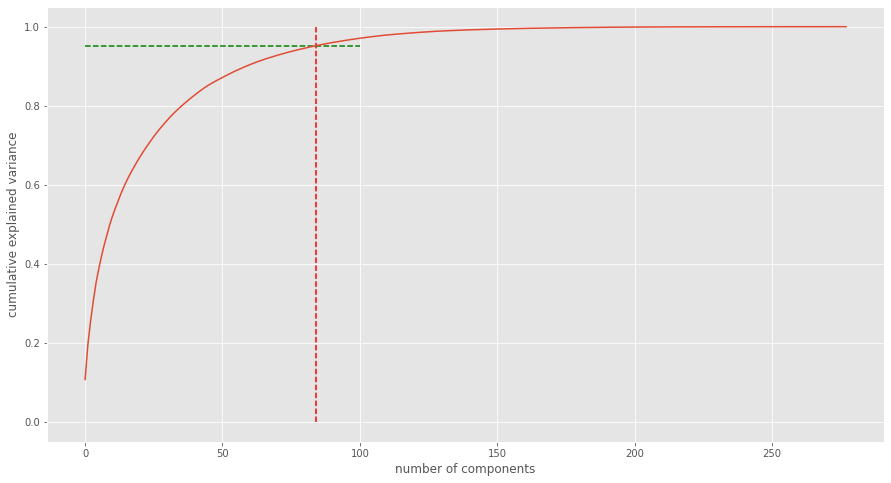

In [113]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.vlines(x=84, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- 60 components explain 90% variance

- 84 components explain 95% variance

In [114]:
# Using IncrementalPCA to save memory and time
pca_final = IncrementalPCA(n_components=84)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(41240, 84)

In [115]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [116]:
corrmat.shape

(84, 84)

Plotting the heatmap of the corr matrix

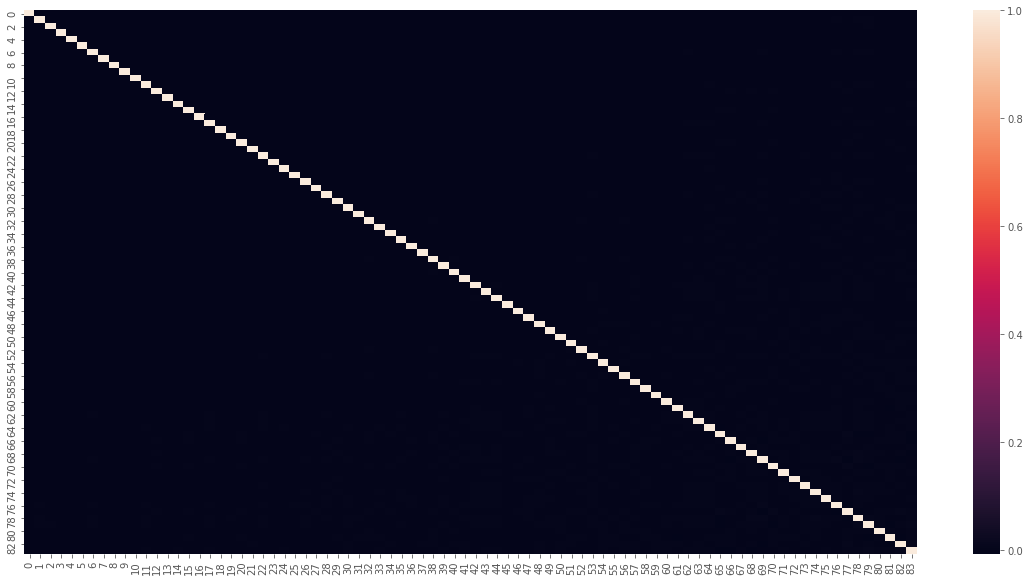

In [117]:
plt.figure(figsize=[20,10])
sns.heatmap(corrmat, annot=False)
plt.show()

In [118]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.007064922833110749 , min corr:  -0.007611246958411621


Applying the transformation on the test set

In [119]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7501, 84)

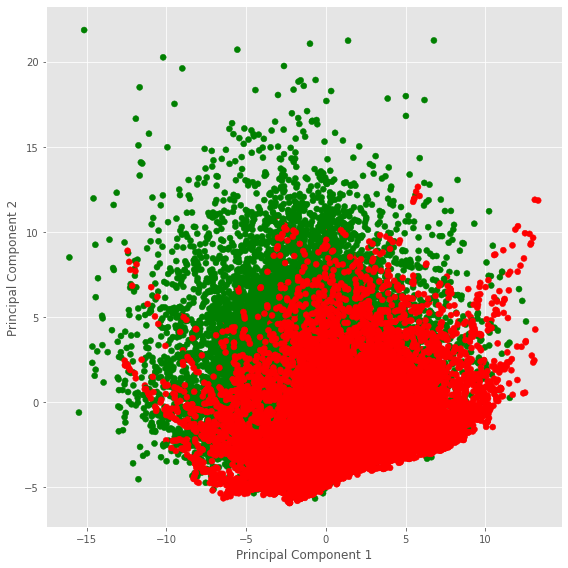

In [120]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

We will be trying 3 models on our PCA pipeline :
- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier

### Logistic Regression + PCA

In [121]:
lr_pca = LogisticRegression()

params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=lr_pca, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [122]:
# fit model
model.fit(df_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   10.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [123]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.073,0.031,0.000,0.000,0.100,l1,"{'C': 0.1, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,9
1,1.807,0.130,0.028,0.006,0.100,l2,"{'C': 0.1, 'penalty': 'l2'}",0.875,0.852,0.863,0.871,0.865,0.865,0.008,6
2,0.200,0.189,0.000,0.000,0.500,l1,"{'C': 0.5, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,10
3,1.698,0.209,0.012,0.005,0.500,l2,"{'C': 0.5, 'penalty': 'l2'}",0.875,0.852,0.862,0.871,0.866,0.865,0.008,1
4,0.054,0.017,0.000,0.000,1,l1,"{'C': 1, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,11


In [124]:
# print best hyperparameters
print("Best Recall: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Recall:  0.865370595382746
Best hyperparameters:  {'C': 0.5, 'penalty': 'l2'}


- Will go ahead with these hyperparameters

In [125]:
lr_pca = LogisticRegression(C=0.5,penalty='l2')
model_lr_pca = lr_pca.fit(df_train_pca,y_train)

- We will now use the training set again to find the optimum threshold 

In [126]:
pred_train = model_lr_pca.predict_proba(df_train_pca)
y_pred_default = model_lr_pca.predict(df_train_pca)

In [127]:
print(classification_report(y_train,y_pred_default))
print(confusion_matrix(y_train,y_pred_default))
print(accuracy_score(y_train,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     20665
           1       0.84      0.87      0.85     20575

    accuracy                           0.85     41240
   macro avg       0.85      0.85      0.85     41240
weighted avg       0.85      0.85      0.85     41240

[[17374  3291]
 [ 2772 17803]]
0.8529825412221145


In [128]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_train)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [129]:
fpr, tpr, thresholds =roc_curve(y_pred_final.target,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.9256582307768519


In [130]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

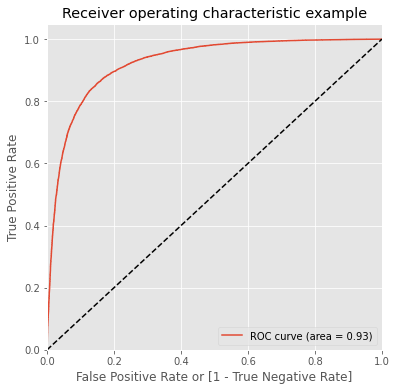

In [131]:
draw_roc(y_pred_final.target, y_pred_final.churn_prob)

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,target,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001,1,0,0,0,0,0,0,0,0,0
1,0,0.005,1,0,0,0,0,0,0,0,0,0
2,0,0.971,1,1,1,1,1,1,1,1,1,1
3,1,0.931,1,1,1,1,1,1,1,1,1,1
4,0,0.591,1,1,1,1,1,1,0,0,0,0


- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.target, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.499  1.000  0.000
0.100 0.100     0.743  0.982  0.505
0.200 0.200     0.800  0.958  0.643
0.300 0.300     0.830  0.933  0.728
0.400 0.400     0.846  0.901  0.792
0.500 0.500     0.853  0.865  0.841
0.600 0.600     0.851  0.819  0.883
0.700 0.700     0.836  0.752  0.919
0.800 0.800     0.799  0.649  0.950
0.900 0.900     0.714  0.450  0.977


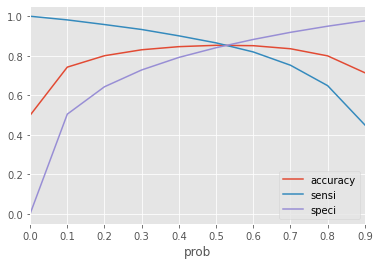

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [135]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.target,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5299053654244607]


- But looking at the curve, we will go with a lower threshold as for our usecase Sensitivity / Recall is more important

In [136]:
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.44 else 0)

y_pred_final.target.value_counts()

0    20665
1    20575
Name: target, dtype: int64

- Now we will use this threshold to predict on test

In [137]:
y_pred_final = pd.DataFrame()
preds = model_lr_pca.predict_proba(df_test_pca)[:,[1]].tolist()
flat_list = [item for sublist in preds for item in sublist]
y_pred_final['churn_prob'] = flat_list
y_pred_final['target'] = y_test

y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.44 else 0)

y_pred_final.target.value_counts()

0    6895
1     606
Name: target, dtype: int64

In [138]:
confusion = metrics.confusion_matrix( y_pred_final.target, y_pred_final.pred_churn )
confusion

array([[5569, 1326],
       [ 113,  493]])

##### Recall
TP / TP + FN

In [139]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8135313531353136

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_final['pred_churn']))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

# check area under curve
print("AUC: ", round(roc_auc_score(y_test, y_pred_final['pred_churn']),2))

Accuracy Score on test data:  0.8081589121450473
Sensitivity:  0.8135313531353136
Specificity:  0.8076867295141407
False postive rate:  0.1923132704858593
Positive predictive value:  0.27102803738317754
Negative predictive value:  0.9801126363956354
Misclassification Rate:  0.19184108785495269
AUC:  0.81


### Random Forest + PCA

In [141]:
# COMMENTING OUT FOR FASTER RE-RUNS, UNCOMMENT THE PARAMS FOR RESULT REPRODUCIBILITY 
params = {
#     'max_depth': [2,4,6],
#     'criterion': ['gini', 'entropy'],
#     'min_samples_leaf': range(100, 400, 200),
#     'min_samples_split': range(200, 500, 200),
#     'n_estimators': [100,200,300], 
#     'max_features': ['auto',0.5]
}

rf = RandomForestClassifier()

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [142]:
# fit model
model.fit(df_train_pca,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   42.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [143]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,43.159,0.745,0.118,0.005,{},0.977,0.969,0.967,0.968,0.971,0.970,0.004,1


In [144]:
# print best hyperparameters
print("Best Recall: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Recall:  0.9702065613608749
Best hyperparameters:  {}


- Running it with all params mentioned in the grid it took us 132.9 mins, hence storing the result for re-runs

- Best Params : 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200

- Will go ahead with these hyperparameters

In [145]:
rf_pca = RandomForestClassifier(criterion='gini',max_depth=6,max_features='auto',
                                min_samples_leaf=100,min_samples_split=200,n_estimators=200,
                                random_state=2020)
model_rf_pca = rf_pca.fit(df_train_pca,y_train)

In [146]:
y_pred_default = model_rf_pca.predict(df_train_pca)
pred_train = model_rf_pca.predict_proba(df_train_pca)

In [147]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_train)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [148]:
fpr, tpr, thresholds =roc_curve(y_pred_final.target,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.9445644589571711


In [149]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

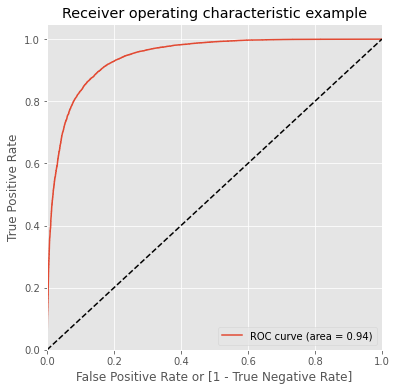

In [150]:
draw_roc(y_pred_final.target, y_pred_final.churn_prob)

In [151]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,target,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.325,1,1,1,1,0,0,0,0,0,0
1,0,0.304,1,1,1,1,0,0,0,0,0,0
2,0,0.581,1,1,1,1,1,1,0,0,0,0
3,1,0.709,1,1,1,1,1,1,1,1,0,0
4,0,0.381,1,1,1,1,0,0,0,0,0,0


- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.target, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.499  1.000  0.000
0.100 0.100     0.499  1.000  0.000
0.200 0.200     0.537  1.000  0.076
0.300 0.300     0.713  0.995  0.433
0.400 0.400     0.842  0.960  0.723
0.500 0.500     0.871  0.864  0.879
0.600 0.600     0.827  0.700  0.953
0.700 0.700     0.709  0.429  0.988
0.800 0.800     0.552  0.103  0.999
0.900 0.900     0.501  0.000  1.000


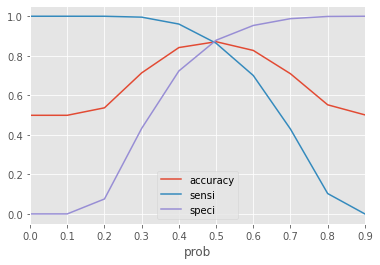

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [154]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.target,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.4932555831508713]


- But looking at the curve, we will go with a lower threshold as for our usecase Sensitivity / Recall is more important

In [155]:
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.45 else 0)

y_pred_final.target.value_counts()

0    20665
1    20575
Name: target, dtype: int64

- Now we will use this threshold to predict on test

In [156]:
y_pred_final = pd.DataFrame()
preds = model_rf_pca.predict_proba(df_test_pca)[:,[1]].tolist()
flat_list = [item for sublist in preds for item in sublist]
y_pred_final['churn_prob'] = flat_list
y_pred_final['target'] = y_test

y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.45 else 0)

y_pred_final.target.value_counts()

0    6895
1     606
Name: target, dtype: int64

In [157]:
confusion_rf = metrics.confusion_matrix( y_pred_final.target, y_pred_final.pred_churn )
confusion_rf

array([[5569, 1326],
       [ 143,  463]])

In [158]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_final['pred_churn']))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

# check area under curve
print("AUC: ", round(roc_auc_score(y_test, y_pred_final['pred_churn']),2))

Accuracy Score on test data:  0.804159445407279
Sensitivity:  0.764026402640264
Specificity:  0.8076867295141407
False postive rate:  0.1923132704858593
Positive predictive value:  0.2588038010061487
Negative predictive value:  0.9749649859943977
Misclassification Rate:  0.19584055459272098
AUC:  0.79


### XGBoost Classifier + PCA

- First we will tune max_depth and min_child_weight, keeping the other params constant

In [159]:
# COMMENTING OUT FOR FASTER RE-RUNS, UNCOMMENT THE PARAMS FOR RESULT REPRODUCIBILITY 
param_1 = {
#            'max_depth':[2,4,6],
#            'min_child_weight':[1,3,5]
}

xgb = XGBClassifier(learning_rate = 0.1,
                    n_estimators=100,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    random_state=2020)

# create 3 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

model = GridSearchCV(estimator=xgb, cv=folds, param_grid=param_1, scoring='recall', n_jobs=-1, verbose=2)

In [160]:
# fit model
model.fit(df_train_pca,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=2020, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=0.8,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, retu

In [161]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,18.150,0.360,0.030,0.006,{},0.946,0.938,0.942,0.942,0.003,1


In [162]:
# print best hyperparameters
print("Best Recall: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Recall:  0.9418714034204765
Best hyperparameters:  {}


- Running it with all params mentioned in the grid it took us time, hence storing the result for re-runs

- Best Params : 'max_depth': 6, 'min_child_weight': 1

- Now we will tune gamma

In [163]:
# COMMENTING OUT FOR FASTER RE-RUNS, UNCOMMENT THE PARAMS FOR RESULT REPRODUCIBILITY 
param_2 = {
#            'gamma':[i/10.0 for i in range(0,5)]
}

xgb = XGBClassifier(learning_rate = 0.1,
                    n_estimators=100,
                    max_depth=6,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    random_state=2020)

# create 3 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

model = GridSearchCV(estimator=xgb, cv=folds, param_grid=param_2, scoring='recall', n_jobs=-1, verbose=1)

In [164]:
# fit model
model.fit(df_train_pca,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=2020, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=0.8,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, retu

In [165]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,20.952,0.586,0.049,0.026,{},0.960,0.953,0.956,0.956,0.003,1


In [166]:
# print best hyperparameters
print("Best Recall: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Recall:  0.9564035578800937
Best hyperparameters:  {}


- Running it with all params mentioned in the grid it took us time, hence storing the result for re-runs

- Best Params : 'gamma': 0.4

- Will go ahead with these hyperparameters

In [167]:
xgb_pca = XGBClassifier(learning_rate = 0.1,
                    n_estimators=100,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0.4,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    random_state=2020)
model_xgb_pca = xgb_pca.fit(df_train_pca,y_train)

In [168]:
y_pred_default = model_xgb_pca.predict(df_train_pca)
pred_train = model_xgb_pca.predict_proba(df_train_pca)

In [169]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_train)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [170]:
fpr, tpr, thresholds =roc_curve(y_pred_final.target,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.9874992725180576


In [171]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

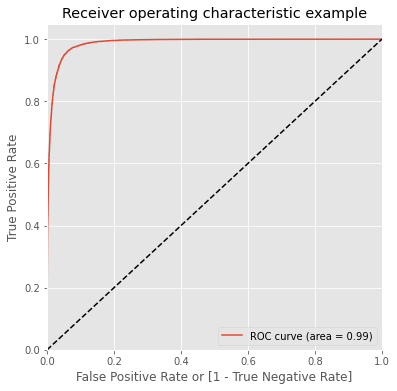

In [172]:
draw_roc(y_pred_final.target, y_pred_final.churn_prob)

In [173]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,target,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055,1,0,0,0,0,0,0,0,0,0
1,0,0.069,1,0,0,0,0,0,0,0,0,0
2,0,0.387,1,1,1,1,0,0,0,0,0,0
3,1,0.923,1,1,1,1,1,1,1,1,1,1
4,0,0.075,1,0,0,0,0,0,0,0,0,0


- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [174]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.target, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.499  1.000  0.000
0.100 0.100     0.824  0.999  0.650
0.200 0.200     0.896  0.996  0.797
0.300 0.300     0.927  0.990  0.864
0.400 0.400     0.942  0.979  0.905
0.500 0.500     0.950  0.963  0.936
0.600 0.600     0.946  0.936  0.956
0.700 0.700     0.929  0.887  0.971
0.800 0.800     0.891  0.797  0.985
0.900 0.900     0.787  0.578  0.995


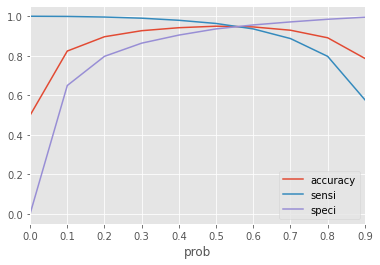

In [175]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [176]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.target,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5588586926460266]


- But looking at the curve, we will go with a lower threshold as for our usecase Sensitivity / Recall is more important

In [177]:
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_pred_final.target.value_counts()

0    20665
1    20575
Name: target, dtype: int64

- Now we will use this threshold to predict on test

In [178]:
y_pred_final = pd.DataFrame()
preds = model_xgb_pca.predict_proba(df_test_pca)[:,[1]].tolist()
flat_list = [item for sublist in preds for item in sublist]
y_pred_final['churn_prob'] = flat_list
y_pred_final['target'] = y_test

y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_pred_final.target.value_counts()

0    6895
1     606
Name: target, dtype: int64

In [179]:
confusion_xgb = metrics.confusion_matrix( y_pred_final.target, y_pred_final.pred_churn )
confusion_xgb

array([[6355,  540],
       [ 240,  366]])

In [180]:
TN = confusion_xgb[0,0] # true positive 
TP = confusion_xgb[1,1] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_final['pred_churn']))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

# check area under curve
print("AUC: ", round(roc_auc_score(y_test, y_pred_final['pred_churn']),2))

Accuracy Score on test data:  0.8960138648180243
Sensitivity:  0.6039603960396039
Specificity:  0.9216823785351704
False postive rate:  0.07831762146482958
Positive predictive value:  0.40397350993377484
Negative predictive value:  0.9636087945413192
Misclassification Rate:  0.10398613518197573
AUC:  0.76


### Predictive Model Outcomes

- Logistic Regression + PCA : Tuned for hyperparameters using GridCV with 5 StratifiedKFold + Optimum Threshold
    - Test Set Report :
            Accuracy Score on test data:  0.8081589121450473
            Sensitivity:  0.8135313531353136
            Specificity:  0.8076867295141407
            False postive rate:  0.1923132704858593
            Positive predictive value:  0.27102803738317754
            Negative predictive value:  0.9801126363956354
            Misclassification Rate:  0.19184108785495269
            AUC:  0.81
            
- Random Forest + PCA : Tuned for hyperparameters using GridCV with 5 StratifiedKFold + Optimum Threshold
    - Test Set Report :
            Accuracy Score on test data:  0.804159445407279
            Sensitivity:  0.764026402640264
            Specificity:  0.8076867295141407
            False postive rate:  0.1923132704858593
            Positive predictive value:  0.2588038010061487
            Negative predictive value:  0.9749649859943977
            Misclassification Rate:  0.19584055459272098
            AUC:  0.79
      
- Xgboost + PCA : Tuned for hyperparameters using GridCV with 3 StratifiedKFold + Optimum Threshold
    - Test Set Report :
            Accuracy Score on test data:  0.8960138648180243
            Sensitivity:  0.6039603960396039
            Specificity:  0.9216823785351704
            False postive rate:  0.07831762146482958
            Positive predictive value:  0.40397350993377484
            Negative predictive value:  0.9636087945413192
            Misclassification Rate:  0.10398613518197573
            AUC:  0.76

- We want our model to focus on identifying churners than the non-churners accurately, Hence the best evaluation metric to judge performance will be Sensitivity / Recall
- That is why we went ahead with recall as the soring metric during hyperparameter tuning
- **Logistic Regression + PCA** is the best model in terms of our focus metric - Sensitivity / Recall

## Interpretability : Model Building + Evaluation

- We aim to build a model which is interpretable and helps us to identify the Churn Drivers

### Logistic Regression

- We will be using a Random Forest Model to extract top 15 features and then use a Logistic Regression Model to under the drivers

In [181]:
rf_fe_extract = RandomForestClassifier(n_jobs=-1,random_state=2020,verbose=1)

In [182]:
rf_fe_extract = rf_fe_extract.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


In [183]:
features = X_train.columns
importance = rf_fe_extract.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance.head(15)

Sum of importance= 100.0


,variables,importance_percentage
0,roam_og_mou_8,4.014
1,loc_ic_t2m_mou_8,3.664
2,total_ic_mou_8,3.501
3,night_pck_user_8_0.0,2.982
4,last_day_rch_amt_8,2.893
5,roam_ic_mou_8,2.758
6,loc_og_t2m_mou_8,2.465
7,std_ic_t2o_mou_8_0.0,2.383
8,roam_og_mou_diff,2.305
9,std_og_t2c_mou_8_0.0,2.243


In [184]:
# extract top 'n' features
top_n = 15
top_features = feature_importance.variables[0:top_n]

In [185]:
X_train = X_train[top_features]

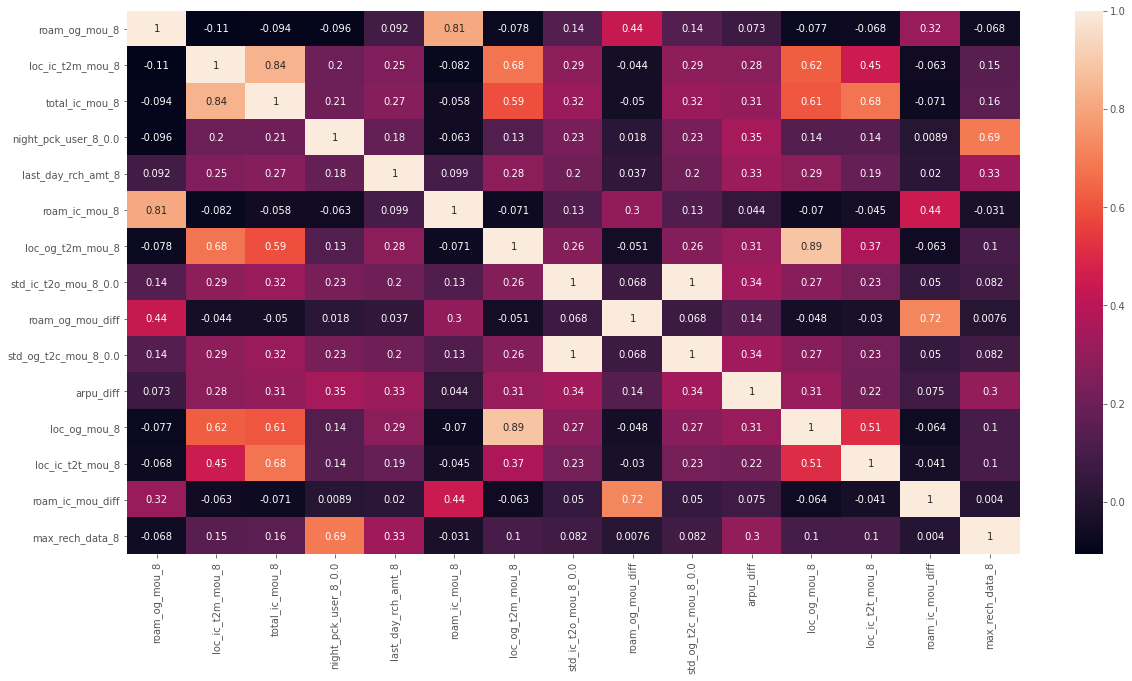

In [186]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

- Removing highly correlated features

In [187]:
X_train = X_train.drop(['loc_og_t2m_mou_8','std_og_t2c_mou_8_0.0'],1)

- VIF 

In [188]:
def vif(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [189]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                41240
Model:                            GLM   Df Residuals:                    41226
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16592.
Date:                Mon, 28 Sep 2020   Deviance:                       33184.
Time:                        19:41:24   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7697      0.072     38.220      0.000       2.628       2.912
roam_og_mou_8            0.2362      0.023     10.055      0.000       0.190       0.282
loc_ic_t2m_mou_8        -0.2275      0.045     -5.013      0.000      -0.316      -0.139
total_ic_mou_8          -0.5302      0.050    -10.614      0.000      -0.628      -0.432
night_pck_user_8_0.0    -1.7213      0.042    -41.282      0.000      -1.803      -1.640
last_day_rch_amt_8      -0.3920      0.019    -21.188      0.000      -0.428      -0.356
roam_ic_mou_8            0.0750      0.024      3.109      0.002       0.028       0.122
std_ic_t2o_mou_8_0.0    -3.2645      0.074    -44.397      0.000      -3.409      -3.120
roam_og_mou_diff         0.0785      0.021      3.654      0.000       0.036       0.121
arpu_diff               -0.4184      0.016    -26.548      0.000      -0.449      -0.388
loc_og_mou_8            -0.3858      0.030    -12.859      0.000      -0.445      -0.327
loc_ic_t2t_mou_8         0.0284      0.032      0.889      0.374      -0.034       0.091
roam_ic_mou_diff        -0.0350      0.023     -1.533      0.125      -0.080       0.010
max_rech_data_8          0.0288      0.024      1.204      0.229      -0.018       0.076
========================================================================================
"""

In [190]:
vif_v = vif(X_train)
vif_v

,Features,VIF
2,total_ic_mou_8,6.350
1,loc_ic_t2m_mou_8,4.710
0,roam_og_mou_8,4.420
5,roam_ic_mou_8,4.370
7,roam_og_mou_diff,3.070
11,roam_ic_mou_diff,3.070
3,night_pck_user_8_0.0,2.960
6,std_ic_t2o_mou_8_0.0,2.510
10,loc_ic_t2t_mou_8,2.350
12,max_rech_data_8,2.200


- Removing feature based on p-values and VIF

In [191]:
X_train = X_train.drop(['loc_ic_t2t_mou_8'],1)

In [192]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                41240
Model:                            GLM   Df Residuals:                    41227
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16592.
Date:                Mon, 28 Sep 2020   Deviance:                       33185.
Time:                        19:41:25   Pearson chi2:                 4.81e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7696      0.072     38.221      0.000       2.628       2.912
roam_og_mou_8            0.2362      0.023     10.058      0.000       0.190       0.282
loc_ic_t2m_mou_8        -0.2395      0.043     -5.554      0.000      -0.324      -0.155
total_ic_mou_8          -0.5054      0.041    -12.325      0.000      -0.586      -0.425
night_pck_user_8_0.0    -1.7203      0.042    -41.276      0.000      -1.802      -1.639
last_day_rch_amt_8      -0.3919      0.018    -21.190      0.000      -0.428      -0.356
roam_ic_mou_8            0.0746      0.024      3.092      0.002       0.027       0.122
std_ic_t2o_mou_8_0.0    -3.2646      0.074    -44.401      0.000      -3.409      -3.120
roam_og_mou_diff         0.0784      0.021      3.650      0.000       0.036       0.120
arpu_diff               -0.4187      0.016    -26.574      0.000      -0.450      -0.388
loc_og_mou_8            -0.3789      0.029    -13.090      0.000      -0.436      -0.322
roam_ic_mou_diff        -0.0347      0.023     -1.517      0.129      -0.079       0.010
max_rech_data_8          0.0284      0.024      1.188      0.235      -0.018       0.075
========================================================================================
"""

In [193]:
vif_v = vif(X_train)
vif_v

,Features,VIF
0,roam_og_mou_8,4.420
5,roam_ic_mou_8,4.370
1,loc_ic_t2m_mou_8,4.060
2,total_ic_mou_8,4.030
7,roam_og_mou_diff,3.070
10,roam_ic_mou_diff,3.060
3,night_pck_user_8_0.0,2.960
6,std_ic_t2o_mou_8_0.0,2.510
11,max_rech_data_8,2.200
9,loc_og_mou_8,1.970


- Removing feature based on p-values and VIF

In [194]:
X_train = X_train.drop(['max_rech_data_8'],1)

In [195]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                41240
Model:                            GLM   Df Residuals:                    41228
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16593.
Date:                Mon, 28 Sep 2020   Deviance:                       33186.
Time:                        19:41:26   Pearson chi2:                 4.83e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7762      0.073     38.271      0.000       2.634       2.918
roam_og_mou_8            0.2352      0.023     10.023      0.000       0.189       0.281
loc_ic_t2m_mou_8        -0.2398      0.043     -5.560      0.000      -0.324      -0.155
total_ic_mou_8          -0.5051      0.041    -12.318      0.000      -0.585      -0.425
night_pck_user_8_0.0    -1.6880      0.031    -53.621      0.000      -1.750      -1.626
last_day_rch_amt_8      -0.3866      0.018    -21.536      0.000      -0.422      -0.351
roam_ic_mou_8            0.0755      0.024      3.133      0.002       0.028       0.123
std_ic_t2o_mou_8_0.0    -3.2890      0.071    -46.347      0.000      -3.428      -3.150
roam_og_mou_diff         0.0783      0.021      3.647      0.000       0.036       0.120
arpu_diff               -0.4177      0.016    -26.556      0.000      -0.448      -0.387
loc_og_mou_8            -0.3801      0.029    -13.140      0.000      -0.437      -0.323
roam_ic_mou_diff        -0.0351      0.023     -1.538      0.124      -0.080       0.010
========================================================================================
"""

In [196]:
vif_v = vif(X_train)
vif_v

,Features,VIF
0,roam_og_mou_8,4.420
5,roam_ic_mou_8,4.360
1,loc_ic_t2m_mou_8,4.060
2,total_ic_mou_8,4.030
7,roam_og_mou_diff,3.070
10,roam_ic_mou_diff,3.060
9,loc_og_mou_8,1.970
6,std_ic_t2o_mou_8_0.0,1.780
3,night_pck_user_8_0.0,1.720
8,arpu_diff,1.400


In [197]:
X_train = X_train.drop(['roam_ic_mou_diff'],1)

In [198]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                41240
Model:                            GLM   Df Residuals:                    41229
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16594.
Date:                Mon, 28 Sep 2020   Deviance:                       33188.
Time:                        19:41:26   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7766      0.073     38.284      0.000       2.634       2.919
roam_og_mou_8            0.2525      0.021     12.199      0.000       0.212       0.293
loc_ic_t2m_mou_8        -0.2405      0.043     -5.581      0.000      -0.325      -0.156
total_ic_mou_8          -0.5015      0.041    -12.262      0.000      -0.582      -0.421
night_pck_user_8_0.0    -1.6874      0.031    -53.609      0.000      -1.749      -1.626
last_day_rch_amt_8      -0.3859      0.018    -21.516      0.000      -0.421      -0.351
roam_ic_mou_8            0.0540      0.020      2.749      0.006       0.016       0.093
std_ic_t2o_mou_8_0.0    -3.2893      0.071    -46.361      0.000      -3.428      -3.150
roam_og_mou_diff         0.0531      0.014      3.799      0.000       0.026       0.080
arpu_diff               -0.4181      0.016    -26.583      0.000      -0.449      -0.387
loc_og_mou_8            -0.3809      0.029    -13.166      0.000      -0.438      -0.324
========================================================================================
"""

In [199]:
vif_v = vif(X_train)
vif_v

,Features,VIF
1,loc_ic_t2m_mou_8,4.060
2,total_ic_mou_8,4.020
0,roam_og_mou_8,3.430
5,roam_ic_mou_8,2.980
9,loc_og_mou_8,1.970
6,std_ic_t2o_mou_8_0.0,1.780
3,night_pck_user_8_0.0,1.720
8,arpu_diff,1.400
7,roam_og_mou_diff,1.270
4,last_day_rch_amt_8,1.260


- Finalizing Model as p-values and VIF are under control

In [200]:
final_feats = X_train.columns

In [201]:
lr = LogisticRegression()

params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=lr, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [202]:
# fit model
model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [203]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008,0.003,0.000,0.000,0.100,l1,"{'C': 0.1, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,9
1,0.361,0.030,0.007,0.001,0.100,l2,"{'C': 0.1, 'penalty': 'l2'}",0.837,0.812,0.815,0.824,0.822,0.822,0.009,1
2,0.020,0.007,0.000,0.000,0.500,l1,"{'C': 0.5, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,10
3,0.334,0.050,0.007,0.000,0.500,l2,"{'C': 0.5, 'penalty': 'l2'}",0.837,0.812,0.814,0.824,0.822,0.822,0.009,1
4,0.013,0.006,0.000,0.000,1,l1,"{'C': 1, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,11


In [204]:
# print best hyperparameters
print("Best Recall: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Recall:  0.8220170109356015
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


- Will go ahead with these hyperparameters

In [205]:
lr = LogisticRegression(C=0.1,penalty='l2')
model_lr = lr.fit(X_train,y_train)

- We will now use the training set again to find the optimum threshold 

In [206]:
pred_train = model_lr.predict_proba(X_train)
y_pred_default = model_lr.predict(X_train)

In [207]:
print(classification_report(y_train,y_pred_default))
print(confusion_matrix(y_train,y_pred_default))
print(accuracy_score(y_train,y_pred_default))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     20665
           1       0.82      0.82      0.82     20575

    accuracy                           0.82     41240
   macro avg       0.82      0.82      0.82     41240
weighted avg       0.82      0.82      0.82     41240

[[16966  3699]
 [ 3664 16911]]
0.8214597478176527


In [208]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_train)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [209]:
fpr, tpr, thresholds =roc_curve(y_pred_final.target,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8984261647722346


In [210]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

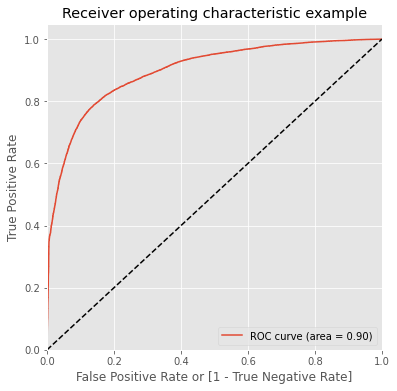

In [211]:
draw_roc(y_pred_final.target, y_pred_final.churn_prob)

In [212]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,target,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014,1,0,0,0,0,0,0,0,0,0
1,0,0.181,1,1,0,0,0,0,0,0,0,0
2,0,0.901,1,1,1,1,1,1,1,1,1,1
3,1,0.700,1,1,1,1,1,1,1,1,0,0
4,0,0.651,1,1,1,1,1,1,1,0,0,0


- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [213]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.target, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.499  1.000  0.000
0.100 0.100     0.644  0.982  0.307
0.200 0.200     0.742  0.944  0.540
0.300 0.300     0.786  0.895  0.677
0.400 0.400     0.805  0.863  0.748
0.500 0.500     0.821  0.822  0.821
0.600 0.600     0.822  0.757  0.887
0.700 0.700     0.792  0.645  0.937
0.800 0.800     0.734  0.495  0.972
0.900 0.900     0.682  0.372  0.991


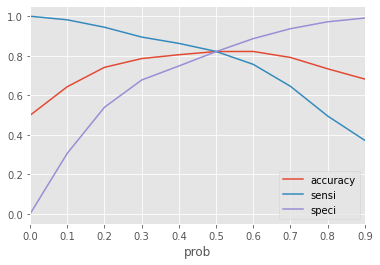

In [214]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [215]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.target,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5004992614885404]


- But looking at the curve, we will go with a lower threshold as for our usecase Sensitivity / Recall is more important

In [216]:
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.45 else 0)

y_pred_final.target.value_counts()

0    20665
1    20575
Name: target, dtype: int64

- Now we will use this threshold to predict on test

In [217]:
y_pred_final = pd.DataFrame()
preds = model_lr.predict_proba(X_test[final_feats])[:,[1]].tolist()
flat_list = [item for sublist in preds for item in sublist]
y_pred_final['churn_prob'] = flat_list
y_pred_final['target'] = y_test

y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.45 else 0)

y_pred_final.target.value_counts()

0    6895
1     606
Name: target, dtype: int64

In [218]:
confusion = metrics.confusion_matrix( y_pred_final.target, y_pred_final.pred_churn )
confusion

array([[5434, 1461],
       [ 120,  486]])

##### Recall
TP / TP + FN

In [219]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.801980198019802

In [220]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_final['pred_churn']))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

# check area under curve
print("AUC: ", round(roc_auc_score(y_test, y_pred_final['pred_churn']),2))

Accuracy Score on test data:  0.7892281029196108
Sensitivity:  0.801980198019802
Specificity:  0.7881073241479333
False postive rate:  0.21189267585206673
Positive predictive value:  0.24961479198767333
Negative predictive value:  0.9783939503060857
Misclassification Rate:  0.2107718970803893
AUC:  0.8


In [221]:
logistic_model = model_lr

In [222]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [223]:
# coefficients
coefficients = logistic_model.coef_.reshape((10, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [224]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,roam_og_mou_8,loc_ic_t2m_mou_8,total_ic_mou_8,night_pck_user_8_0.0,last_day_rch_amt_8,roam_ic_mou_8,std_ic_t2o_mou_8_0.0,roam_og_mou_diff,arpu_diff,loc_og_mou_8
0,2.622,0.250,-0.246,-0.503,-1.664,-0.378,0.053,-3.135,0.053,-0.419,-0.382


### Interpretability Model Outcomes

- We did feature selection using Random Forest to select the top 15 most important features using feature_importance
- Then used them to train our interpretable Logistic Regression Model + Tuned for hyperparameters using GridCV with 5 StratifiedKFold +  Optimum Threshold

- Model Specs :
    - 10 Features
    - Test Set Report :
            Accuracy Score on test data:  0.7892281029196108
            Sensitivity:  0.801980198019802
            Specificity:  0.7881073241479333
            False postive rate:  0.21189267585206673
            Positive predictive value:  0.24961479198767333
            Negative predictive value:  0.9783939503060857
            Misclassification Rate:  0.2107718970803893
            AUC:  0.8       

In [225]:
coefficients.T.rename(columns={0:'Coefficient'}).sort_values(by='Coefficient')

,Coefficient
std_ic_t2o_mou_8_0.0,-3.135
night_pck_user_8_0.0,-1.664
total_ic_mou_8,-0.503
arpu_diff,-0.419
loc_og_mou_8,-0.382
last_day_rch_amt_8,-0.378
loc_ic_t2m_mou_8,-0.246
roam_og_mou_diff,0.053
roam_ic_mou_8,0.053
roam_og_mou_8,0.250


- 'roam_og_mou_8' - Roaming outgoing minutes of usage in August


- 'loc_ic_t2m_mou_8' - Local incoming operator, T to other operator mobile, minutes of usage in the                                month of August


- 'total_ic_mou_8' - Total incoming minutes of usage in the month of August


- 'night_pck_user_8_0.0' - Not a night pack user in the month of August


- 'last_day_rch_amt_8' - Last day recharge amount in the month of August


- 'roam_ic_mou_8' - Roaming incoming minutes of usage in the month of August


- 'std_ic_t2o_mou_8_0.0' - STD incoming calls operator T to other operator fixed line minutes of usage in the month of August


- 'roam_og_mou_diff' - Difference between roaming outgoing minutes of usage in August and that of June and July collectively (averaged)


- 'arpu_diff' - Difference between average revenue per user of August and that of June and July collectively (averaged)


- 'loc_og_mou_8' - Local outgoing minutes of usage in the month of August

## Conclusion

- **Predictive Model** : PCA + Logistic Regression
- **Interpretable Model** : Feature Selection using Random Forest + Logistic Regression

## Recommendations

#### 1. Lower the last day recharge amount, higher the churn rate. This can be avoided by giving discounts / offers when the user is recharging smaller amounts to incentivize him to go for a bigger recharge.

#### 2. Higher the incoming roaming amount, higher is the churn rate. Roaming Prices needs to be adjusted for better retention of customers.

#### 3. Night pack active users are less likely churn, this indicates more users should be bought to this segment.

#### 4. Average revenue per user is a KPI which should be closely monitored to get early warnings about customers -  who are likely to churn.

#### 5. This project scope can be strengthened by adding customer complaint data to our analysis.